In [2]:
A = [(14947.9,0.786),(23031,0.799),(30918,0.857),(37152.8,0.889),(37004.2,0.8921)]

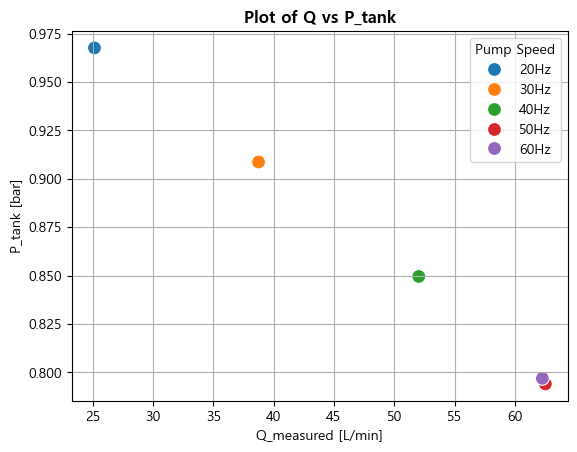

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic') # Windows의 경우

# 이전 대화에서 계산된 (Re, K_o) 데이터 A
A = [
    (25.15,0.9676),
    (38.75,0.9087),
    (52.02,0.8496),
    (62.51,0.7941),
    (62.26,0.797)
]

# 범례에 사용할 라벨
labels = ['20Hz', '30Hz', '40Hz', '50Hz', '60Hz']

# 1. 데이터를 Pandas DataFrame으로 변환합니다.
df = pd.DataFrame({
    'Q_measured': [point[0] for point in A],
    'P': [point[1] for point in A],
    'Frequency': labels
})

# 2. scatterplot을 생성할 때 'hue' 파라미터에 범례로 사용할 열을 지정합니다.
sns.scatterplot(data=df, x='Q_measured', y='P', hue='Frequency', s=100) # s=100은 점 크기 조절

# 제목 및 축 라벨 설정
plt.title('Plot of Q vs P_tank', weight='bold')
plt.xlabel('Q_measured [L/min]')
plt.ylabel('P_tank [bar]')

# 범례 위치를 자동으로 최적의 장소에 배치
plt.legend(title='Pump Speed') 
plt.grid(True) # 그리드 추가
plt.show()

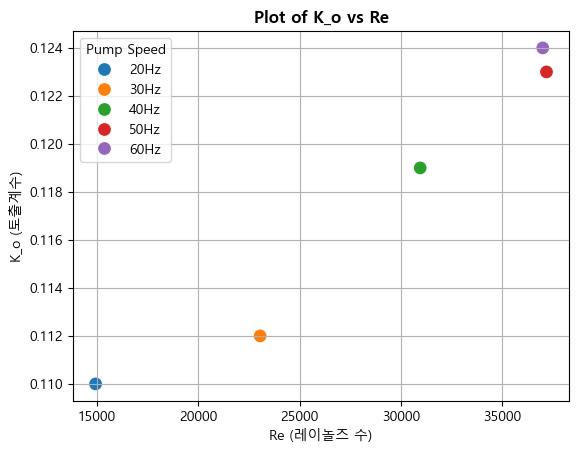

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

#(Re, K_o) 데이터
A = [(14945, 0.110),
    (23059, 0.112),
    (30950, 0.119),
    (37178, 0.123),
    (36994, 0.124)]

#Legend Label
labels = ['20Hz', '30Hz', '40Hz', '50Hz', '60Hz']

#Data Frame
df = pd.DataFrame({
    'Re': [point[0] for point in A],
    'K_o': [point[1] for point in A],
    'Frequency': labels
})

# Scatterplot
sns.scatterplot(data=df, x='Re', y='K_o', hue='Frequency', s=100) # s=100은 점 크기 조절

#Title, axis labeling
plt.title('Plot of K_o vs Re', weight='bold')
plt.xlabel('Re (레이놀즈 수)')
plt.ylabel('K_o (토출계수)')

# Legend
plt.legend(title='Pump Speed') 
plt.grid(True) # 그리드 추가
plt.show()

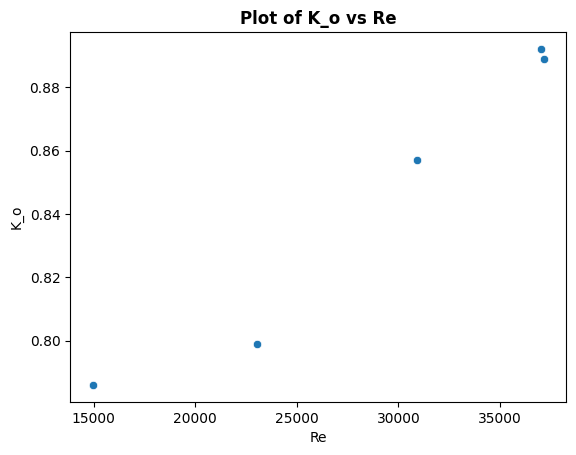

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Split the tuples into x and y values
x_values = [point[0] for point in A]
y_values = [point[1] for point in A]

# Create the plot
sns.scatterplot(x=x_values, y=y_values)
plt.title('Plot of K_o vs Re',weight='bold')
plt.xlabel('Re')
plt.ylabel('K_o')
plt.show()

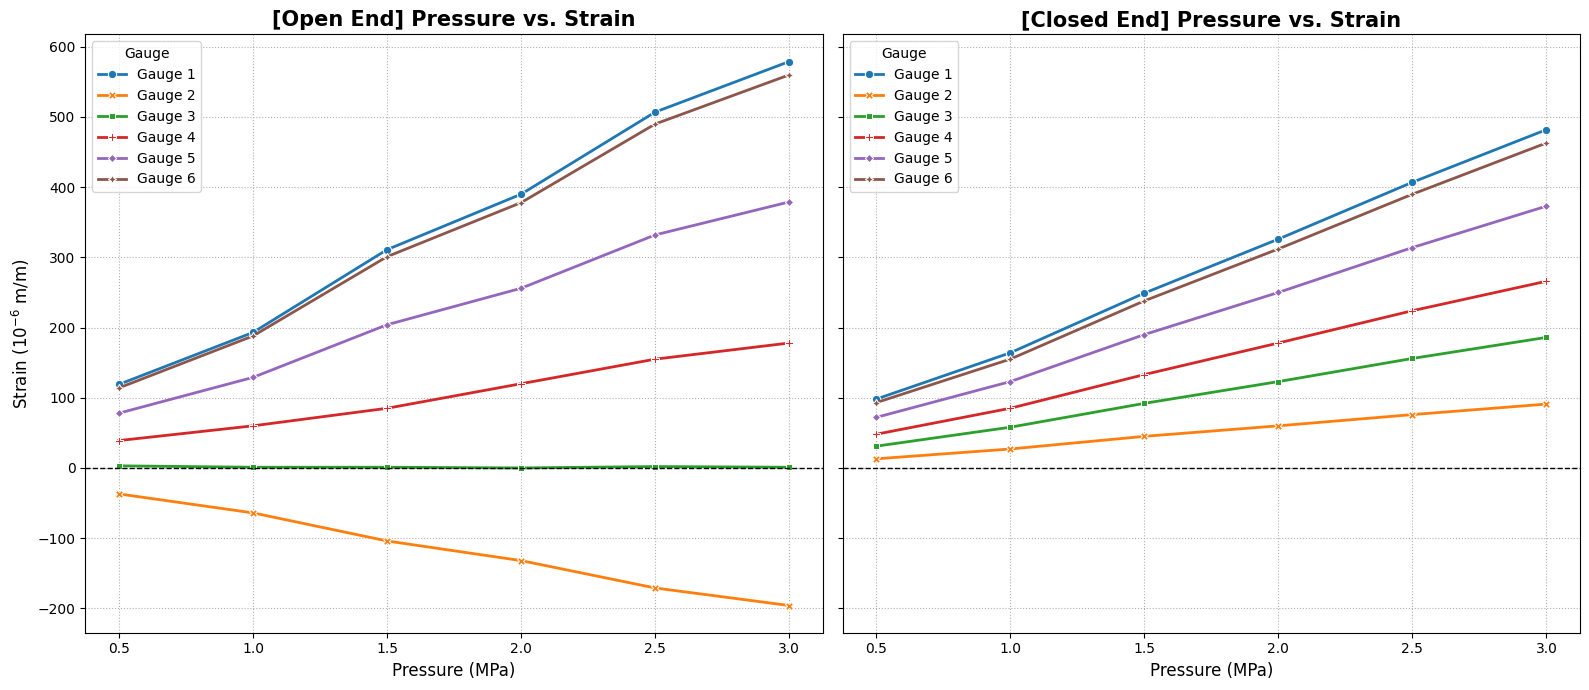

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. 데이터 준비
# ---------------------------------------------------------------

# 공통 압력 데이터
pressure = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

# --- Open End Data ---
open_data = {
    'Pressure': pressure * 6,
    'Strain': [
        119, 193, 311, 390, 507, 579,   # Gauge 1
        -37, -64, -104, -132, -171, -196, # Gauge 2
        3, 1, 1, 0, 2, 1,               # Gauge 3
        39, 60, 85, 120, 155, 178,      # Gauge 4
        78, 129, 204, 256, 332, 379,    # Gauge 5
        114, 188, 301, 378, 490, 560    # Gauge 6
    ],
    'Gauge': (['Gauge 1']*6 + ['Gauge 2']*6 + ['Gauge 3']*6 + 
              ['Gauge 4']*6 + ['Gauge 5']*6 + ['Gauge 6']*6),
    'Condition': ['Open End'] * 36
}

# --- Closed End Data ---
closed_data = {
    'Pressure': pressure * 6,
    'Strain': [
        98, 164, 249, 326, 407, 482,    # Gauge 1
        13, 27, 45, 60, 76, 91,         # Gauge 2
        31, 58, 92, 123, 156, 186,      # Gauge 3
        48, 85, 133, 178, 224, 266,     # Gauge 4
        72, 123, 190, 250, 314, 373,    # Gauge 5
        93, 155, 238, 312, 390, 463     # Gauge 6
    ],
    'Gauge': (['Gauge 1']*6 + ['Gauge 2']*6 + ['Gauge 3']*6 + 
              ['Gauge 4']*6 + ['Gauge 5']*6 + ['Gauge 6']*6),
    'Condition': ['Closed End'] * 36
}

# 데이터프레임 생성
df_open = pd.DataFrame(open_data)
df_closed = pd.DataFrame(closed_data)

# ---------------------------------------------------------------
# 2. 그래프 그리기 (X, Y 축 교체됨)
# ---------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# --- Graph 1: Open End ---
sns.lineplot(
    ax=axes[0],
    data=df_open,
    x='Pressure',    # X축: 압력 (원인)
    y='Strain',      # Y축: 변형률 (결과)
    hue='Gauge',     # 색상 구분
    style='Gauge',   # 선 스타일 구분
    markers=True,
    dashes=False,
    linewidth=2
)
axes[0].set_title('[Open End] Pressure vs. Strain', fontsize=15,weight='bold')
axes[0].set_xlabel('Pressure (MPa)', fontsize=12)
axes[0].set_ylabel('Strain ($10^{-6}$ m/m)', fontsize=12)
axes[0].grid(True, linestyle=':')
axes[0].axhline(0, color='black', linewidth=1, linestyle='--') # 0점 기준선 (수평선)

# --- Graph 2: Closed End ---
sns.lineplot(
    ax=axes[1],
    data=df_closed,
    x='Pressure',    # X축: 압력
    y='Strain',      # Y축: 변형률
    hue='Gauge',
    style='Gauge',
    markers=True,
    dashes=False,
    linewidth=2
)
axes[1].set_title('[Closed End] Pressure vs. Strain', fontsize=15,weight='bold')
axes[1].set_xlabel('Pressure (MPa)', fontsize=12)
axes[1].set_ylabel('') # Y축 공유하므로 생략
axes[1].grid(True, linestyle=':')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--') # 0점 기준선 (수평선)

plt.tight_layout()
plt.show()

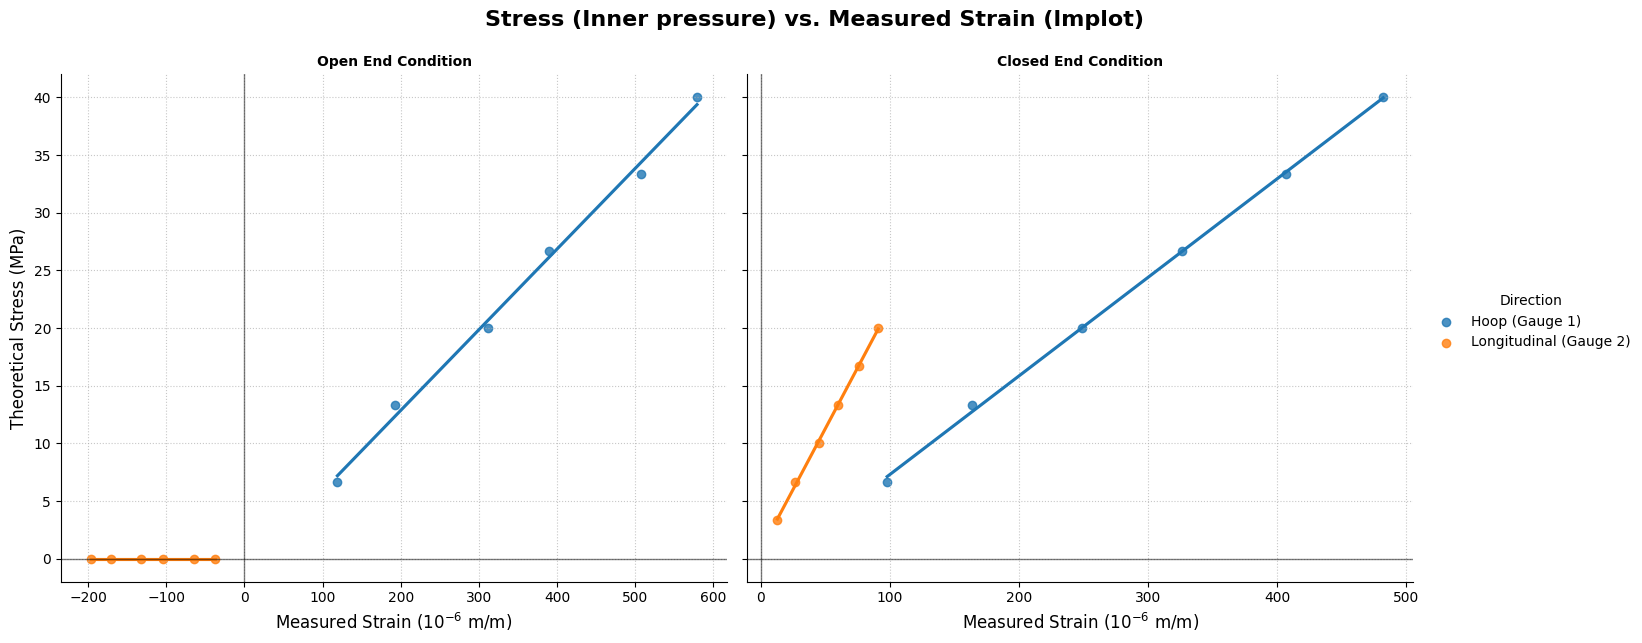

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. 데이터 및 파라미터 준비
# ---------------------------------------------------------
pressure = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
r = 40  # mm
t = 3   # mm

# --- 이론적 응력 계산 (Theoretical Stress) ---
# Hoop Stress (공통): sigma = Pr / t
stress_hoop = (pressure * r) / t

# Longitudinal Stress
stress_long_open = np.zeros_like(pressure)        # Open End = 0
stress_long_closed = (pressure * r) / (2 * t)     # Closed End = Pr / 2t

# --- 실험적 변형률 데이터 (Measured Strain) ---
strain_g1_open = [119, 193, 311, 390, 507, 579]
strain_g2_open = [-37, -64, -104, -132, -171, -196]

strain_g1_closed = [98, 164, 249, 326, 407, 482]
strain_g2_closed = [13, 27, 45, 60, 76, 91]

# ---------------------------------------------------------
# 2. 통합 DataFrame 생성 (Open/Closed 합치기)
# ---------------------------------------------------------
# Open End Data
df_open = pd.DataFrame({
    'Strain': np.concatenate([strain_g1_open, strain_g2_open]),
    'Stress': np.concatenate([stress_hoop, stress_long_open]),
    'Direction': ['Hoop (Gauge 1)'] * 6 + ['Longitudinal (Gauge 2)'] * 6,
    'Condition': ['Open End'] * 12
})

# Closed End Data
df_closed = pd.DataFrame({
    'Strain': np.concatenate([strain_g1_closed, strain_g2_closed]),
    'Stress': np.concatenate([stress_hoop, stress_long_closed]),
    'Direction': ['Hoop (Gauge 1)'] * 6 + ['Longitudinal (Gauge 2)'] * 6,
    'Condition': ['Closed End'] * 12
})

# 전체 데이터 통합
df_all = pd.concat([df_open, df_closed])

# ❗️ 한글 폰트 설정 (필요시 주석 해제)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호

# ---------------------------------------------------------
# 3. lmplot으로 그래프 그리기
# ---------------------------------------------------------
g = sns.lmplot(
    data=df_all,
    x='Strain',
    y='Stress',
    col='Condition',    # Open vs Closed 분리
    hue='Direction',    # Hoop vs Longitudinal 색상 분리
    ci=None,            # 신뢰구간 그림자 제거 (깔끔하게)
    height=6,           # 그래프 높이
    aspect=1.2,         # 가로세로 비율
    facet_kws={'sharex': False, 'sharey': True} # X축 범위는 공유하지 않음 (범위가 다르므로)
)

# ---------------------------------------------------------
# 4. 디자인 다듬기
# ---------------------------------------------------------
# 제목 및 축 레이블
g.fig.suptitle('Stress (Inner pressure) vs. Measured Strain (lmplot)', y=1.05, fontsize=16, fontweight='bold')
g.set_axis_labels('Measured Strain ($10^{-6}$ m/m)', 'Theoretical Stress (MPa)', fontsize=12)
g.set_titles("{col_name} Condition", fontsize=14, fontweight='bold')

# 각 서브플롯에 기준선(0점) 추가 및 그리드 설정
for ax in g.axes.flat:
    ax.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.5) # Y=0
    ax.axvline(0, color='black', linewidth=1, linestyle='-', alpha=0.5) # X=0
    ax.grid(True, linestyle=':', alpha=0.7)

plt.show()

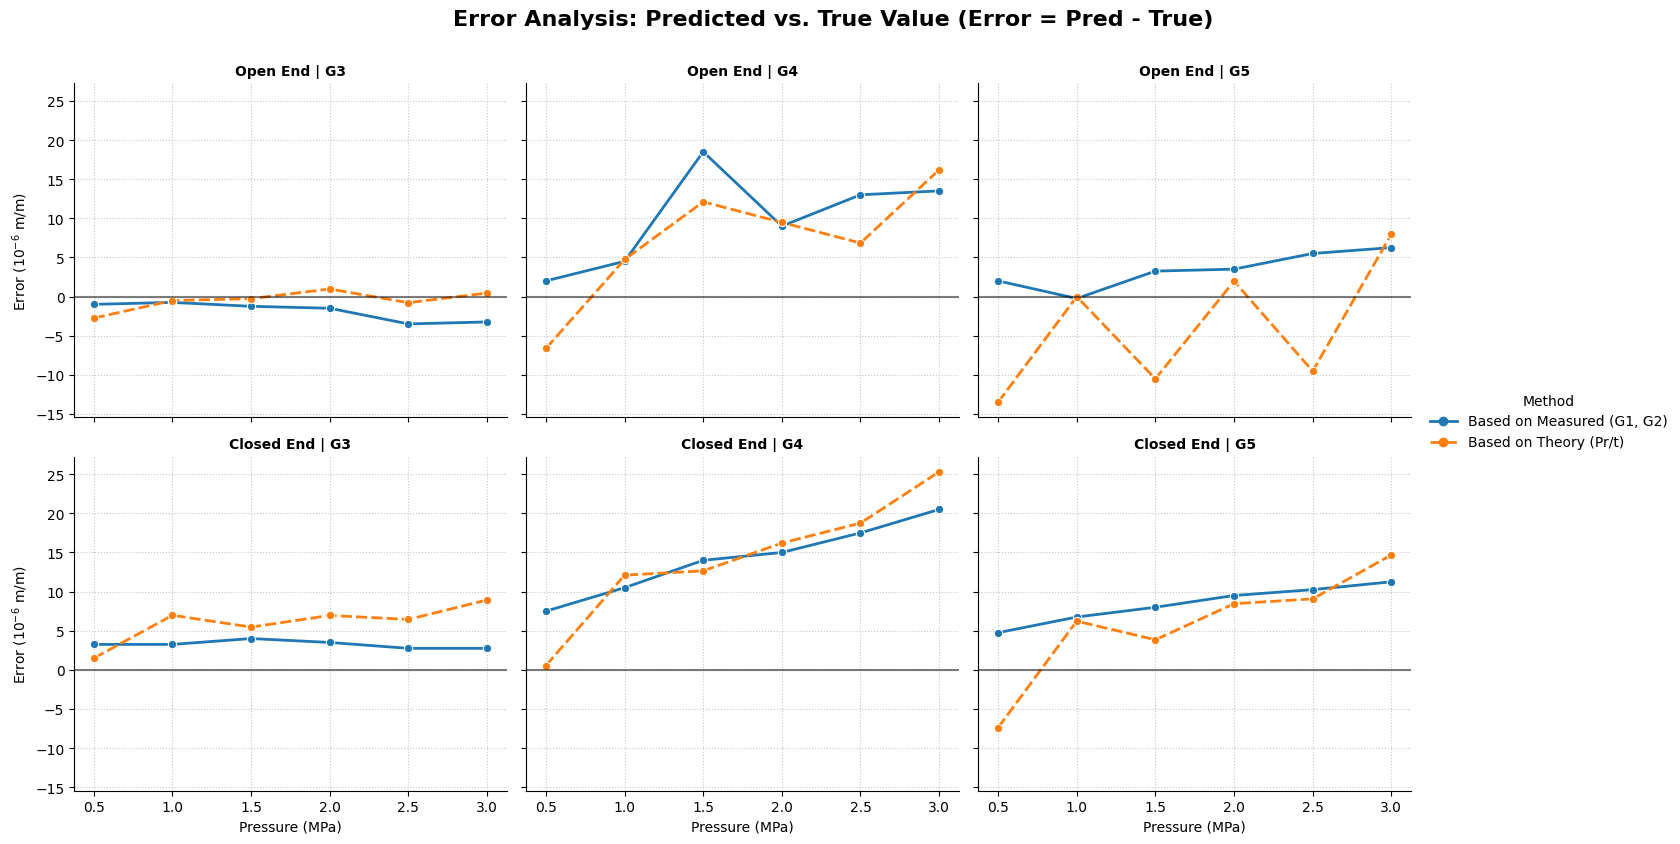

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. 데이터 및 파라미터 준비
# ---------------------------------------------------------
pressure = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
r = 40; t = 3; E = 69000; nu = 0.33  # E in MPa, nu estimated

# 게이지 각도 (라디안)
angles = {'G3': np.deg2rad(-30), 'G4': np.deg2rad(45), 'G5': np.deg2rad(60)}

# --- [입력 1] 실제 측정값 (True Values) ---
# Open End
meas_open = {
    'G1': np.array([119, 193, 311, 390, 507, 579]),
    'G2': np.array([-37, -64, -104, -132, -171, -196]),
    'G3': np.array([3, 1, 1, 0, 2, 1]),
    'G4': np.array([39, 60, 85, 120, 155, 178]),
    'G5': np.array([78, 129, 204, 256, 332, 379])
}
# Closed End
meas_closed = {
    'G1': np.array([98, 164, 249, 326, 407, 482]),
    'G2': np.array([13, 27, 45, 60, 76, 91]),
    'G3': np.array([31, 58, 92, 123, 156, 186]),
    'G4': np.array([48, 85, 133, 178, 224, 266]),
    'G5': np.array([72, 123, 190, 250, 314, 373])
}

# ---------------------------------------------------------
# 2. 계산 함수 정의
# ---------------------------------------------------------
# 모어원 변환 함수 (전단 무시)
def transform_strain(ex, ey, theta):
    return (ex + ey)/2 + (ex - ey)/2 * np.cos(2 * theta)

# 이론적 주 변형률 계산 함수
def calc_theory_principal(p_arr, condition):
    sigma_h = (p_arr * r) / t
    if condition == 'Open End':
        sigma_l = 0
    else:
        sigma_l = (p_arr * r) / (2 * t)
    
    # Hooke's Law
    eps_x_theory = (sigma_l - nu * sigma_h) / E * 1e6 # microstrain
    eps_y_theory = (sigma_h - nu * sigma_l) / E * 1e6 # microstrain
    return eps_x_theory, eps_y_theory

# ---------------------------------------------------------
# 3. 데이터 프레임 생성 (오차 계산 포함)
# ---------------------------------------------------------
data_list = []

for condition, meas_data in [('Open End', meas_open), ('Closed End', meas_closed)]:
    # 1. Prediction Source A: Measured Principal Strains (G1, G2)
    ex_meas = meas_data['G2']
    ey_meas = meas_data['G1']
    
    # 2. Prediction Source B: Theoretical Principal Strains (Formula)
    ex_theo, ey_theo = calc_theory_principal(pressure, condition)
    
    # 각 게이지(G3, G4, G5)에 대해 반복
    for g_name in ['G3', 'G4', 'G5']:
        theta = angles[g_name]
        true_value = meas_data[g_name]
        
        # 예측값 계산
        pred_from_meas = transform_strain(ex_meas, ey_meas, theta)
        pred_from_theo = transform_strain(ex_theo, ey_theo, theta)
        
        # 오차 계산 (Error = Predicted - True)
        # 1) 실측 기반 예측의 오차
        error_meas = pred_from_meas - true_value
        # 2) 이론 기반 예측의 오차
        error_theo = pred_from_theo - true_value
        
        # 데이터 저장 (Measured Base)
        for i, p in enumerate(pressure):
            data_list.append({
                'Pressure': p, 'Error': error_meas[i], 'Condition': condition,
                'Gauge': g_name, 'Method': 'Based on Measured (G1, G2)'
            })
            
        # 데이터 저장 (Theoretical Base)
        for i, p in enumerate(pressure):
            data_list.append({
                'Pressure': p, 'Error': error_theo[i], 'Condition': condition,
                'Gauge': g_name, 'Method': 'Based on Theory (Pr/t)'
            })

df = pd.DataFrame(data_list)

# ---------------------------------------------------------
# 4. 그래프 그리기 (FacetGrid)
# ---------------------------------------------------------
# 행(Row): Condition, 열(Col): Gauge
g = sns.relplot(
    data=df,
    x='Pressure',
    y='Error',
    col='Gauge',        # 열: 게이지별로 나누기
    row='Condition',    # 행: Open/Closed 나누기
    hue='Method',       # 색상: 예측 방법 (이론 vs 실측기반)
    style='Method',     # 스타일: 점선/실선 구분
    kind='line',
    marker='o',
    height=4,
    aspect=1.2,
    linewidth=2
)

# ---------------------------------------------------------
# 5. 디자인 다듬기
# ---------------------------------------------------------
g.fig.suptitle('Error Analysis: Predicted vs. True Value (Error = Pred - True)', y=1.05, fontsize=16, fontweight='bold')
g.set_axis_labels('Pressure (MPa)', 'Error ($10^{-6}$ m/m)')
g.set_titles("{row_name} | {col_name}", fontweight='bold')

# 각 그래프에 0점 기준선 추가
for ax in g.axes.flat:
    ax.axhline(0, color='black', linewidth=1.5, linestyle='-', alpha=0.5)
    ax.grid(True, linestyle=':', alpha=0.7)

plt.show()

c:\miniconda\envs\vscode_ju\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\miniconda\envs\vscode_ju\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


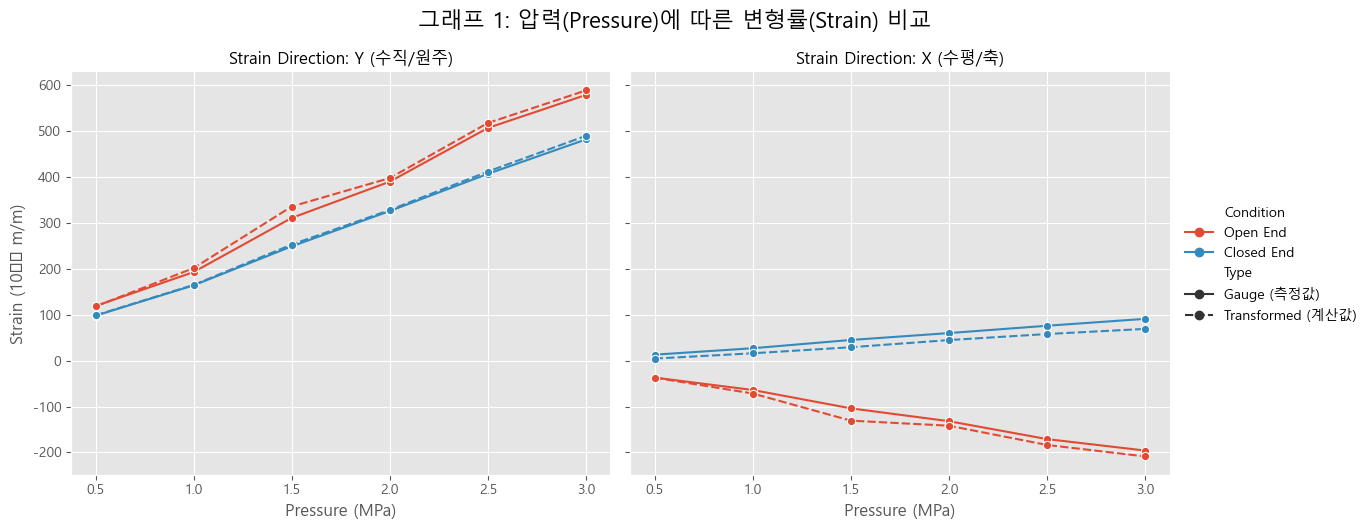

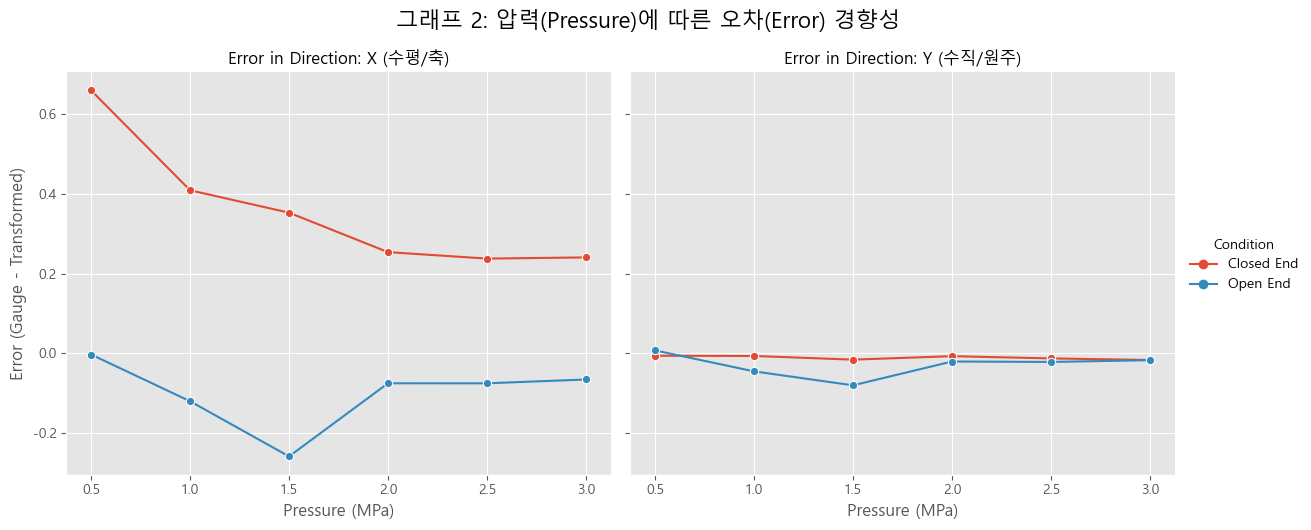

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. 데이터 준비 (이전과 동일)
# ---------------------------------------------------------------
data = {
    'Pressure': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] * 8, 
    'Strain': [
        # --- Open End ---
        119, 193, 311, 390, 507, 579,         # Open - Gauge 1 (Y)
        118.1, 201.66, 335.81, 397.86, 517.78, 588.78, # Open - Transformed (Y)
        -37, -64, -104, -132, -171, -196,     # Open - Gauge 2 (X)
        -37.1, -71.66, -130.81, -141.86, -183.78, -208.78, # Open - Transformed (X)
        # --- Closed End ---
        98, 164, 249, 326, 407, 482,         # Closed - Gauge 1 (Y)
        98.56, 165.03, 252.86, 328.22, 412.05, 489.88, # Closed - Transformed (Y)
        13, 27, 45, 60, 76, 91,               # Closed - Gauge 2 (X)
        4.44, 15.97, 29.14, 44.78, 57.95, 69.12    # Closed - Transformed (X)
    ],
    'Condition': (['Open End'] * 24) + (['Closed End'] * 24),
    'Direction': (['Y (수직/원주)'] * 12 + ['X (수평/축)'] * 12) * 2,
    'Type': (['Gauge (측정값)'] * 6 + ['Transformed (계산값)'] * 6) * 4
}

df = pd.DataFrame(data)

# ❗️ 한글 폰트 설정 (필요시 주석 해제)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호

# ---------------------------------------------------------------
# 3. 그래프 1: 변형률(Strain) 비교 (이전과 동일)
# ---------------------------------------------------------------
g_strain = sns.relplot(
    data=df,
    x='Pressure',
    y='Strain',
    col='Direction',
    hue='Condition',
    style='Type',
    kind='line',
    marker='o',
    height=5,
    aspect=1.2
)
g_strain.fig.suptitle('그래프 1: 압력(Pressure)에 따른 변형률(Strain) 비교', y=1.05, fontsize=16)
g_strain.set_axis_labels('Pressure (MPa)', 'Strain (10⁻⁶ m/m)')
g_strain.set_titles("Strain Direction: {col_name}", fontsize=12)

# ---------------------------------------------------------------
# 4. (추가) 오차(Error) 계산
# ---------------------------------------------------------------
# 'Type'을 기준으로 DataFrame을 피벗(pivot)하여 'Gauge'와 'Transformed'를 열로 만듦
df_pivot = df.pivot_table(
    index=['Pressure', 'Condition', 'Direction'],
    columns='Type',
    values='Strain'
).reset_index()

# 'Gauge' - 'Transformed'로 오차 계산
df_pivot['Error (Gauge - Transformed)'] = (df_pivot['Gauge (측정값)'] - df_pivot['Transformed (계산값)']) / df_pivot['Gauge (측정값)']


# ---------------------------------------------------------------
# 5. (추가) 그래프 2: 오차(Error) 플로팅
# ---------------------------------------------------------------
g_error = sns.relplot(
    data=df_pivot,
    x='Pressure',
    y='Error (Gauge - Transformed)',
    col='Direction',     # X방향 오차, Y방향 오차를 나눠서 그림
    hue='Condition',     # Open/Closed를 색상으로 구분
    kind='line',
    marker='o',
    height=5,
    aspect=1.2
)
g_error.fig.suptitle('그래프 2: 압력(Pressure)에 따른 오차(Error) 경향성', y=1.05, fontsize=16)
g_error.set_axis_labels('Pressure (MPa)', 'Error (Gauge - Transformed)')
g_error.set_titles("Error in Direction: {col_name}", fontsize=12)

# 두 개의 그래프를 모두 표시
plt.show()

# 인장시험


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
ny = pd.read_excel('tensile_data.xlsx',sheet_name='Nylon 6')
poe = pd.read_excel('tensile_data.xlsx',sheet_name='POE(Black)')
pl_90 = pd.read_excel('tensile_data.xlsx',sheet_name='PLA(90%)')
pl_20 = pd.read_excel('tensile_data.xlsx',sheet_name='PLA(20%)')
al = pd.read_excel('tensile_data.xlsx',sheet_name='Aluminium')

im_ny = pd.read_excel('가상인장.xlsx')

In [2]:
ny_1 = ny[['신율(mm)','하중(kgf)']]
ny_2 = ny[['신율(mm).1','하중(kgf).1']]
ny_3 = ny[['신율(mm).2','하중(kgf).2']]

poe_1 = poe[['신율(mm)','하중(kgf)']]
poe_2 = poe[['신율(mm).1','하중(kgf).1']]
poe_3 = poe[['신율(mm).2','하중(kgf).2']]

pl_90_1 = pl_90[['신율(mm)','하중(kgf)']]
pl_90_2 = pl_90[['신율(mm).1','하중(kgf).1']]


pl_20_1 = pl_20[['신율(mm)','하중(kgf)']]
pl_20_2 = pl_20[['신율(mm).1','하중(kgf).1']]


al_1 = al[['신율(mm)','하중(kgf)']]
al_2 = al[['신율(mm).1','하중(kgf).1']]

im_ny = im_ny[['strain','xx','xy','xz','yx','yy','yz','zx','zy','zz']]

ny_w = 12.72
ny_t = 3.13

poe_w = 9.88
poe_t = 4.1

pla_90_w = 12.82
pla_90_t = 3

al_w = 12.5
al_t = 2.92

In [3]:
# --- 1. 각 소재별 단면적(Area) 계산 (단위: mm^2) ---
# 공식: Area = Width * Thickness

area_ny = 12.72 * 3.13       # Nylon 6
area_poe = 10.25 * 4.10      # POE (Black)
area_pla = 12.79 * 3.43      # PLA (90%, 20% 동일)
area_al = 12.50 * 2.92       # Aluminium

# 중력가속도 상수 (kgf -> N 변환용)
g = 9.80665

# --- 2. 데이터프레임에 Stress(MPa) 컬럼 추가 ---
# 공식: Stress = (Load_kgf * 9.80665) / Area

# 1) Nylon 6
# SettingWithCopyWarning 방지를 위해 .copy()를 사용하는 것이 안전합니다.
ny_1 = ny_1.copy()
ny_2 = ny_2.copy()
ny_3 = ny_3.copy()

ny_1['Stress(MPa)'] = ny_1['하중(kgf)'] * g / area_ny
ny_2['Stress(MPa)'] = ny_2['하중(kgf).1'] * g / area_ny
ny_3['Stress(MPa)'] = ny_3['하중(kgf).2'] * g / area_ny

ny_1['strain'] = ny_1['신율(mm)'] / 50.2
ny_2['strain'] = ny_2['신율(mm).1'] / 50.2
ny_3['strain'] = ny_3['신율(mm).2'] / 50.2

# 2) POE (Black)
poe_1 = poe_1.copy()
poe_2 = poe_2.copy()
poe_3 = poe_3.copy()

poe_1['Stress(MPa)'] = poe_1['하중(kgf)'] * g / area_poe
poe_2['Stress(MPa)'] = poe_2['하중(kgf).1'] * g / area_poe
poe_3['Stress(MPa)'] = poe_3['하중(kgf).2'] * g / area_poe

poe_1['strain'] = poe_1['신율(mm)'] /50.2
poe_2['strain'] = poe_2['신율(mm).1'] /50.2
poe_3['strain'] = poe_3['신율(mm).2'] /50.2

# 3) PLA (90%)
pl_90_1 = pl_90_1.copy()
pl_90_2 = pl_90_2.copy()

pl_90_1['Stress(MPa)'] = pl_90_1['하중(kgf)'] * g / area_pla
pl_90_2['Stress(MPa)'] = pl_90_2['하중(kgf).1'] * g / area_pla

pl_90_1['strain'] = pl_90_1['신율(mm)'] / 50.2
pl_90_2['strain'] = pl_90_2['신율(mm).1'] / 50.2

# 4) PLA (20%)
pl_20_1 = pl_20_1.copy()
pl_20_2 = pl_20_2.copy()

pl_20_1['Stress(MPa)'] = pl_20_1['하중(kgf)'] * g / area_pla
pl_20_2['Stress(MPa)'] = pl_20_2['하중(kgf).1'] * g / area_pla

pl_20_1['strain'] = pl_20_1['신율(mm)'] / 50.2
pl_20_2['strain'] = pl_20_2['신율(mm).1'] / 50.2

# 5) Aluminium
al_1 = al_1.copy()
al_2 = al_2.copy()

al_1['Stress(MPa)'] = al_1['하중(kgf)'] * g / area_al
al_2['Stress(MPa)'] = al_2['하중(kgf).1'] * g / area_al

al_1['strain'] = al_1['신율(mm)'] / 50.2
al_2['strain'] = al_2['신율(mm).1'] / 50.2

# --- 확인용 출력 ---
print("Nylon Run 1 Head:")
print(ny_1.head())

Nylon Run 1 Head:
   신율(mm)  하중(kgf)  Stress(MPa)  strain
0     0.0   0.0000     0.000000     0.0
1     0.0   1.8500     0.455681     0.0
2     0.0   1.8900     0.465534     0.0
3     0.0   1.9425     0.478465     0.0
4     0.0   1.9880     0.489672     0.0


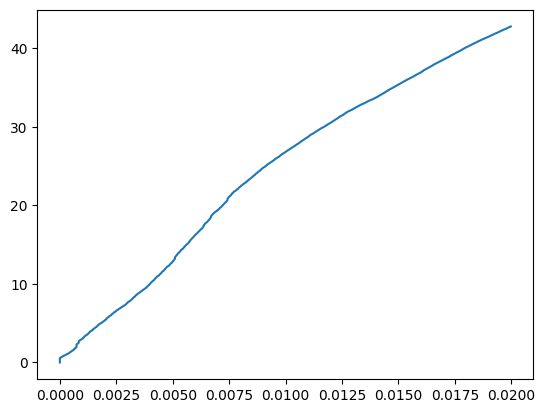

In [11]:
plt.plot(ny_1.loc[ny_1['strain']<0.02]['strain'],ny_1.loc[ny_1['strain']<0.02]['Stress(MPa)'])

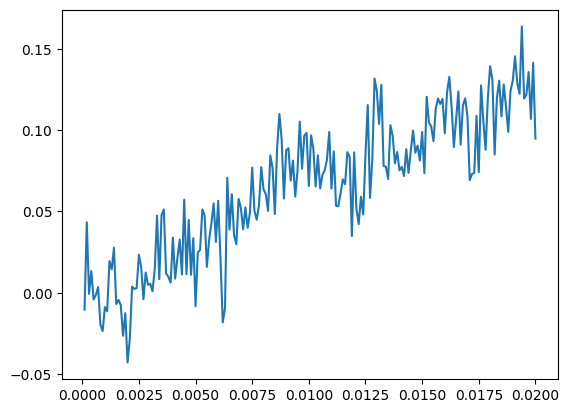

In [ ]:
plt.plot(im_ny['strain'],im_ny['xx'])

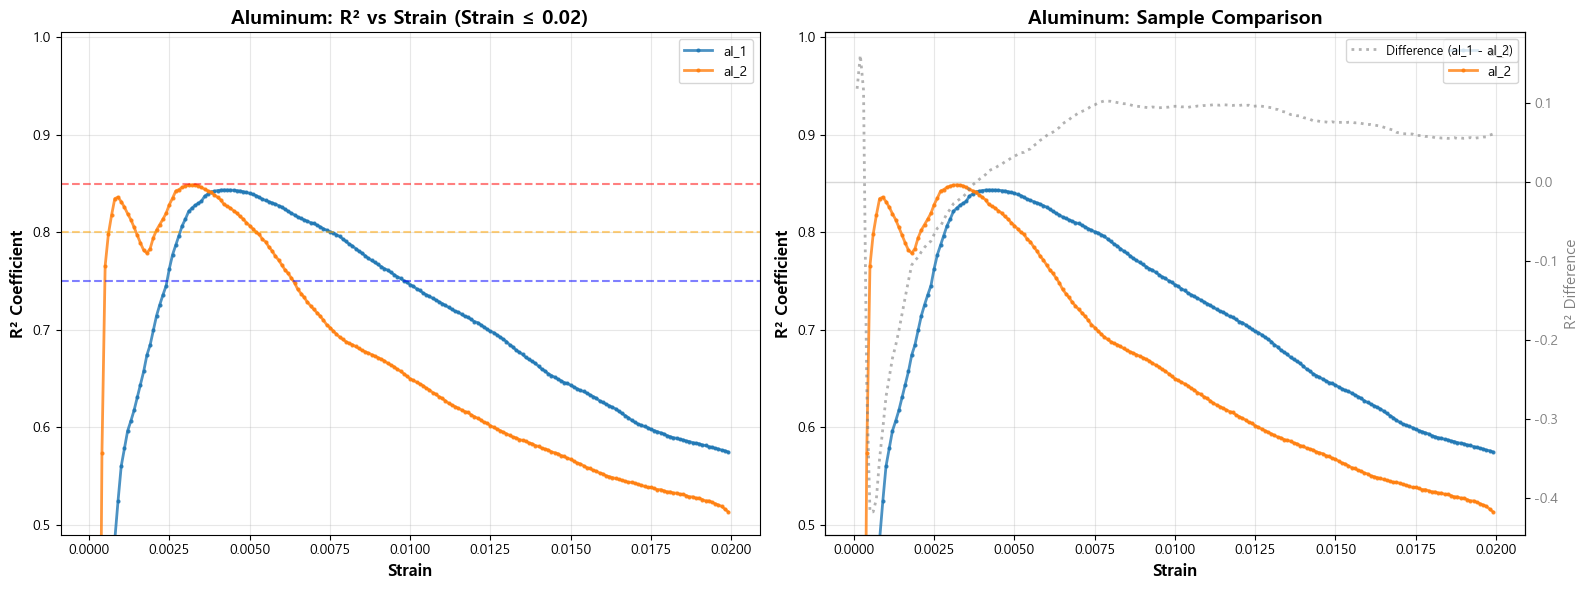


알루미늄 R² 분석 (변형률 ≤ 0.02)

al_1:
  데이터 포인트 수: 199
  변형률 범위: 0.000100 ~ 0.019900
  R² 범위: 0.144237 ~ 0.843383
  평균 R²: 0.696137
  R² < 0.99 시작: 변형률 = 0.000100
  R² < 0.98 시작: 변형률 = 0.000100
  R² < 0.95 시작: 변형률 = 0.000100

al_2:
  데이터 포인트 수: 199
  변형률 범위: 0.000100 ~ 0.019900
  R² 범위: 0.025623 ~ 0.848635
  평균 R²: 0.657579
  R² < 0.99 시작: 변형률 = 0.000100
  R² < 0.98 시작: 변형률 = 0.000100
  R² < 0.95 시작: 변형률 = 0.000100

그래프 저장: 'aluminum_r2_distribution.png'


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['font.family'] = 'Malgun Gothic' # (Windows 예시)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호
# Aluminum dataset names
aluminum_datasets = ['al_1', 'al_2']

# Parameters
STRAIN_INTERVAL = 0.0001  # 더 세밀한 간격 (알루미늄은 탄성영역이 작으므로)
MAX_STRAIN = 0.02  # 최대 변형률
R2_MIN_PLOT = 0.5  # 플롯 최소값

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Color scheme
colors = ['#1f77b4', '#ff7f0e']

# Store results
aluminum_results = []

# Process each aluminum dataset
for sample_idx, dataset_name in enumerate(aluminum_datasets):
    try:
        # Get the dataframe from the variable name
        df = globals()[dataset_name]
        
        # Handle different possible column name formats
        stress_col = None
        strain_col = None
        
        for col in df.columns:
            col_lower = col.lower().strip()
            if 'stress' in col_lower:
                stress_col = col
            if 'strain' in col_lower:
                strain_col = col
        
        if stress_col is None or strain_col is None:
            print(f"Skipping {dataset_name}: Could not find stress/strain columns")
            continue
        
        # Remove NaN values and filter by max strain
        df_clean = df[[stress_col, strain_col]].dropna()
        df_clean = df_clean[df_clean[strain_col] <= MAX_STRAIN]
        
        if len(df_clean) < 10:
            print(f"Skipping {dataset_name}: insufficient data in strain range")
            continue
        
        # Calculate R² at specific strain intervals
        strain_values = []
        r2_values = []
        
        # Get min and max strain
        min_strain = df_clean[strain_col].min()
        max_strain_data = min(df_clean[strain_col].max(), MAX_STRAIN)
        
        # Create strain points at regular intervals
        target_strains = np.arange(min_strain + STRAIN_INTERVAL, max_strain_data, STRAIN_INTERVAL)
        
        for target_strain in target_strains:
            # Get data up to this strain value
            subset = df_clean[df_clean[strain_col] <= target_strain]
            
            # Need at least 10 points for reliable regression
            if len(subset) < 10:
                continue
            
            X = subset[strain_col].values.reshape(-1, 1)
            y = subset[stress_col].values
            
            # Fit linear regression
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            
            # Calculate R²
            r2 = r2_score(y, y_pred)
            
            strain_values.append(target_strain)
            r2_values.append(r2)
        
        if len(strain_values) == 0:
            print(f"No data points for {dataset_name}")
            continue
        
        aluminum_results.append({
            'name': dataset_name,
            'strain': strain_values,
            'r2': r2_values,
            'color': colors[sample_idx]
        })
        
        # Plot 1: R² vs Strain
        ax1.plot(strain_values, r2_values, marker='o', markersize=2, 
                label=dataset_name, linewidth=2, alpha=0.8, 
                color=colors[sample_idx])
        
        # Find where R² drops below certain thresholds
        for threshold in [0.85, 0.8, 0.75]:
            for i, r2 in enumerate(r2_values):
                if r2 < threshold:
                    ax1.plot(strain_values[i], r2_values[i], 'X', 
                           markersize=10, markeredgewidth=2,
                           color=colors[sample_idx], 
                           markeredgecolor='black')
                    ax1.annotate(f'{threshold}', 
                               xy=(strain_values[i], r2_values[i]),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=8, color=colors[sample_idx])
                    break
        
    except KeyError:
        print(f"Dataframe not found: {dataset_name}")
    except Exception as e:
        print(f"Error processing {dataset_name}: {str(e)}")

# Customize Plot 1
ax1.set_xlabel('Strain', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Coefficient', fontsize=12, fontweight='bold')
ax1.set_title('Aluminum: R² vs Strain (Strain ≤ 0.02)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10, loc='best')
ax1.set_ylim([max(R2_MIN_PLOT - 0.01, 0), 1.005])
ax1.axhline(y=0.85, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='R² = 0.99')
ax1.axhline(y=0.8, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='R² = 0.98')
ax1.axhline(y=0.75, color='blue', linestyle='--', linewidth=1.5, alpha=0.5, label='R² = 0.95')

# Plot 2: Overlay of both samples with comparison
if len(aluminum_results) >= 2:
    for result in aluminum_results:
        ax2.plot(result['strain'], result['r2'], marker='o', markersize=2,
                label=result['name'], linewidth=2, alpha=0.8, color=result['color'])
    
    # Calculate difference if same length
    if len(aluminum_results[0]['strain']) == len(aluminum_results[1]['strain']):
        strain_common = aluminum_results[0]['strain']
        r2_diff = np.array(aluminum_results[0]['r2']) - np.array(aluminum_results[1]['r2'])
        
        ax2_twin = ax2.twinx()
        ax2_twin.plot(strain_common, r2_diff, color='gray', linestyle=':', 
                     linewidth=2, alpha=0.6, label='Difference (al_1 - al_2)')
        ax2_twin.set_ylabel('R² Difference', fontsize=11, color='gray')
        ax2_twin.tick_params(axis='y', labelcolor='gray')
        ax2_twin.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.3)
        ax2_twin.legend(fontsize=9, loc='upper right')

ax2.set_xlabel('Strain', fontsize=12, fontweight='bold')
ax2.set_ylabel('R² Coefficient', fontsize=12, fontweight='bold')
ax2.set_title('Aluminum: Sample Comparison', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='best')
ax2.set_ylim([max(R2_MIN_PLOT - 0.01, 0), 1.005])

plt.tight_layout()
plt.savefig('aluminum_r2_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed statistics
print("\n" + "="*70)
print("알루미늄 R² 분석 (변형률 ≤ 0.02)")
print("="*70)
for result in aluminum_results:
    print(f"\n{result['name']}:")
    r2_array = np.array(result['r2'])
    strain_array = np.array(result['strain'])
    
    print(f"  데이터 포인트 수: {len(result['r2'])}")
    print(f"  변형률 범위: {strain_array.min():.6f} ~ {strain_array.max():.6f}")
    print(f"  R² 범위: {r2_array.min():.6f} ~ {r2_array.max():.6f}")
    print(f"  평균 R²: {r2_array.mean():.6f}")
    
    # Find elastic limits at different thresholds
    for threshold in [0.99, 0.98, 0.95]:
        for i, r2 in enumerate(result['r2']):
            if r2 < threshold:
                print(f"  R² < {threshold} 시작: 변형률 = {result['strain'][i]:.6f}")
                break
        else:
            print(f"  R² < {threshold}: 범위 내에서 발생하지 않음")

print("\n그래프 저장: 'aluminum_r2_distribution.png'")

No data points with R² >= 0.5 for poe_3
No data points with R² >= 0.5 for al_1


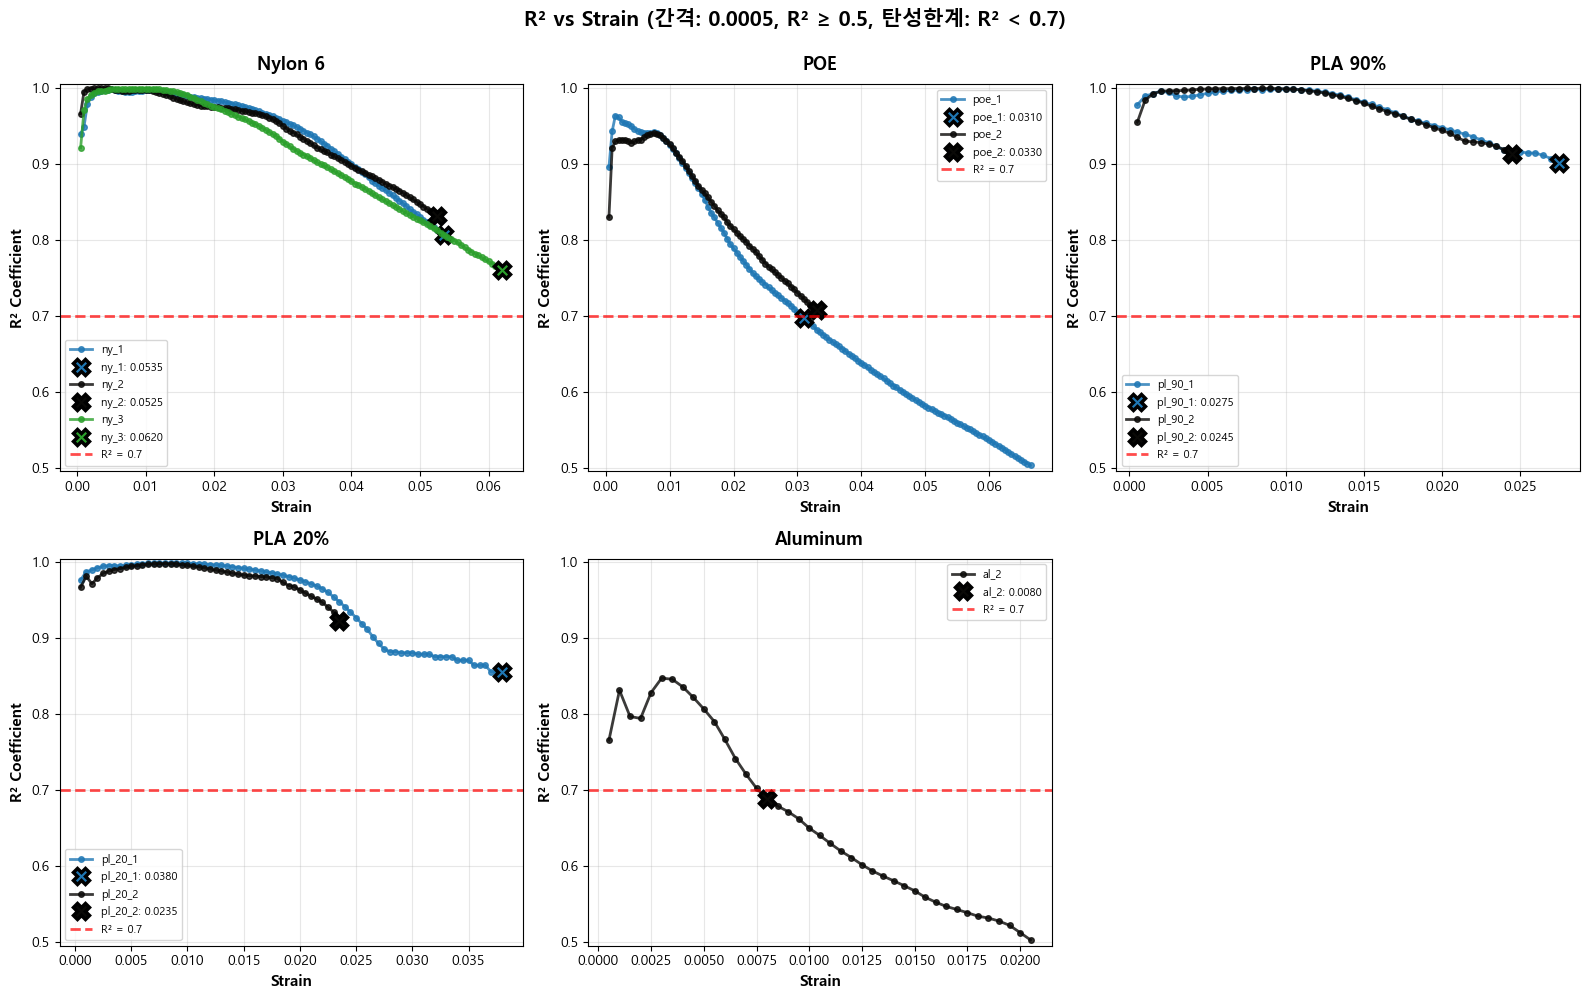


탄성한계 요약 (R² < 0.7인 변형률 값, 간격: 0.0005)

Nylon 6:
  ny_1: 0.053500
  ny_2: 0.052500
  ny_3: 0.062000
  평균: 0.056000 ± 0.004262

POE:
  poe_1: 0.031000
  poe_2: 0.033000
  평균: 0.032000 ± 0.001000

PLA 90%:
  pl_90_1: 0.027500
  pl_90_2: 0.024500
  평균: 0.026000 ± 0.001500

PLA 20%:
  pl_20_1: 0.038000
  pl_20_2: 0.023500
  평균: 0.030750 ± 0.007250

Aluminum:
  al_2: 0.008000
  평균: 0.008000 ± 0.000000

그래프 저장: 'r2_vs_strain_elastic_limits.png'


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['font.family'] = 'Malgun Gothic' # (Windows 예시)

# Dataset names grouped by material type
datasets = {
    'Nylon 6': ['ny_1', 'ny_2', 'ny_3'],
    'POE': ['poe_1', 'poe_2', 'poe_3'],
    'PLA 90%': ['pl_90_1', 'pl_90_2'],
    'PLA 20%': ['pl_20_1', 'pl_20_2'],
    'Aluminum': ['al_1', 'al_2']
}

# Parameters
STRAIN_INTERVAL = 0.0005  # 변형률 간격
R2_THRESHOLD = 0.7 # 탄성영역 끝 판단 기준
R2_MIN_PLOT = 0.5  # 플롯에 표시할 최소 R² 값

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Color scheme for each sample within a material
colors = ['#1f77b4', "#0a0907", '#2ca02c', '#d62728', '#9467bd']

# Store elastic limit results
elastic_limits = {}

# Process each material type
for idx, (material, dataset_names) in enumerate(datasets.items()):
    ax = axes[idx]
    elastic_limits[material] = []
    
    for sample_idx, dataset_name in enumerate(dataset_names):
        try:
            # Get the dataframe from the variable name
            df = globals()[dataset_name]
            
            # Handle different possible column name formats
            stress_col = None
            strain_col = None
            
            for col in df.columns:
                col_lower = col.lower().strip()
                if 'stress' in col_lower:
                    stress_col = col
                if 'strain' in col_lower:
                    strain_col = col
            
            if stress_col is None or strain_col is None:
                print(f"Skipping {dataset_name}: Could not find stress/strain columns")
                continue
            
            # Remove NaN values
            df_clean = df[[stress_col, strain_col]].dropna()
            
            # Skip if not enough data points
            if len(df_clean) < 10:
                print(f"Skipping {dataset_name}: insufficient data")
                continue
            
            # Calculate R² at specific strain intervals
            strain_values = []
            r2_values = []
            
            # Get min and max strain
            min_strain = df_clean[strain_col].min()
            max_strain = df_clean[strain_col].max()
            
            # Create strain points at regular intervals
            target_strains = np.arange(min_strain + STRAIN_INTERVAL, max_strain, STRAIN_INTERVAL)
            
            for target_strain in target_strains:
                # Get data up to this strain value
                subset = df_clean[df_clean[strain_col] <= target_strain]
                
                # Need at least 10 points for reliable regression
                if len(subset) < 10:
                    continue
                
                X = subset[strain_col].values.reshape(-1, 1)
                y = subset[stress_col].values
                
                # Fit linear regression
                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R²
                r2 = r2_score(y, y_pred)
                
                # Only store if R² is above minimum threshold for plotting
                if r2 >= R2_MIN_PLOT:
                    strain_values.append(target_strain)
                    r2_values.append(r2)
                else:
                    # Stop if R² drops below minimum plot threshold
                    break
            
            if len(strain_values) == 0:
                print(f"No data points with R² >= {R2_MIN_PLOT} for {dataset_name}")
                continue
            
            # Find where R² drops below threshold (end of elastic region)
            elastic_limit_strain = None
            for i, r2 in enumerate(r2_values):
                if r2 < R2_THRESHOLD:
                    elastic_limit_strain = strain_values[i]
                    break
            
            # If R² never drops below threshold, use the last point
            if elastic_limit_strain is None and len(strain_values) > 0:
                elastic_limit_strain = strain_values[-1]
            
            if elastic_limit_strain is not None:
                elastic_limits[material].append({
                    'sample': dataset_name,
                    'strain': elastic_limit_strain
                })
            
            # Plot the curve
            line = ax.plot(strain_values, r2_values, marker='o', markersize=4, 
                   label=dataset_name, linewidth=2, alpha=0.8, 
                   color=colors[sample_idx % len(colors)])[0]
            
            # Mark the elastic limit point
            if elastic_limit_strain is not None:
                # Find the R² value at elastic limit
                idx_limit = np.argmin(np.abs(np.array(strain_values) - elastic_limit_strain))
                r2_at_limit = r2_values[idx_limit]
                
                ax.plot(elastic_limit_strain, r2_at_limit, 'X', 
                       markersize=12, markeredgewidth=2.5,
                       color=line.get_color(), 
                       markeredgecolor='black',
                       label=f'{dataset_name}: {elastic_limit_strain:.4f}')
            
        except KeyError:
            print(f"Dataframe not found: {dataset_name}")
        except Exception as e:
            print(f"Error processing {dataset_name}: {str(e)}")
    
    # Add horizontal line at R² threshold
    ax.axhline(y=R2_THRESHOLD, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'R² = {R2_THRESHOLD}')
    
    # Customize each subplot
    ax.set_xlabel('Strain', fontsize=11, fontweight='bold')
    ax.set_ylabel('R² Coefficient', fontsize=11, fontweight='bold')
    ax.set_title(material, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')
    ax.set_ylim([R2_MIN_PLOT - 0.005, 1.005])

# Remove extra subplot
axes[-1].remove()

# Overall title
fig.suptitle(f'R² vs Strain (간격: {STRAIN_INTERVAL}, R² ≥ {R2_MIN_PLOT}, 탄성한계: R² < {R2_THRESHOLD})', 
            fontsize=15, fontweight='bold', y=0.995)

plt.tight_layout()

# Save the plot
plt.savefig('r2_vs_strain_elastic_limits.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary of elastic limits
print("\n" + "="*70)
print(f"탄성한계 요약 (R² < {R2_THRESHOLD}인 변형률 값, 간격: {STRAIN_INTERVAL})")
print("="*70)
for material, limits in elastic_limits.items():
    print(f"\n{material}:")
    strains = [l['strain'] for l in limits]
    for limit in limits:
        print(f"  {limit['sample']}: {limit['strain']:.6f}")
    if strains:
        print(f"  평균: {np.mean(strains):.6f} ± {np.std(strains):.6f}")

print(f"\n그래프 저장: 'r2_vs_strain_elastic_limits.png'")

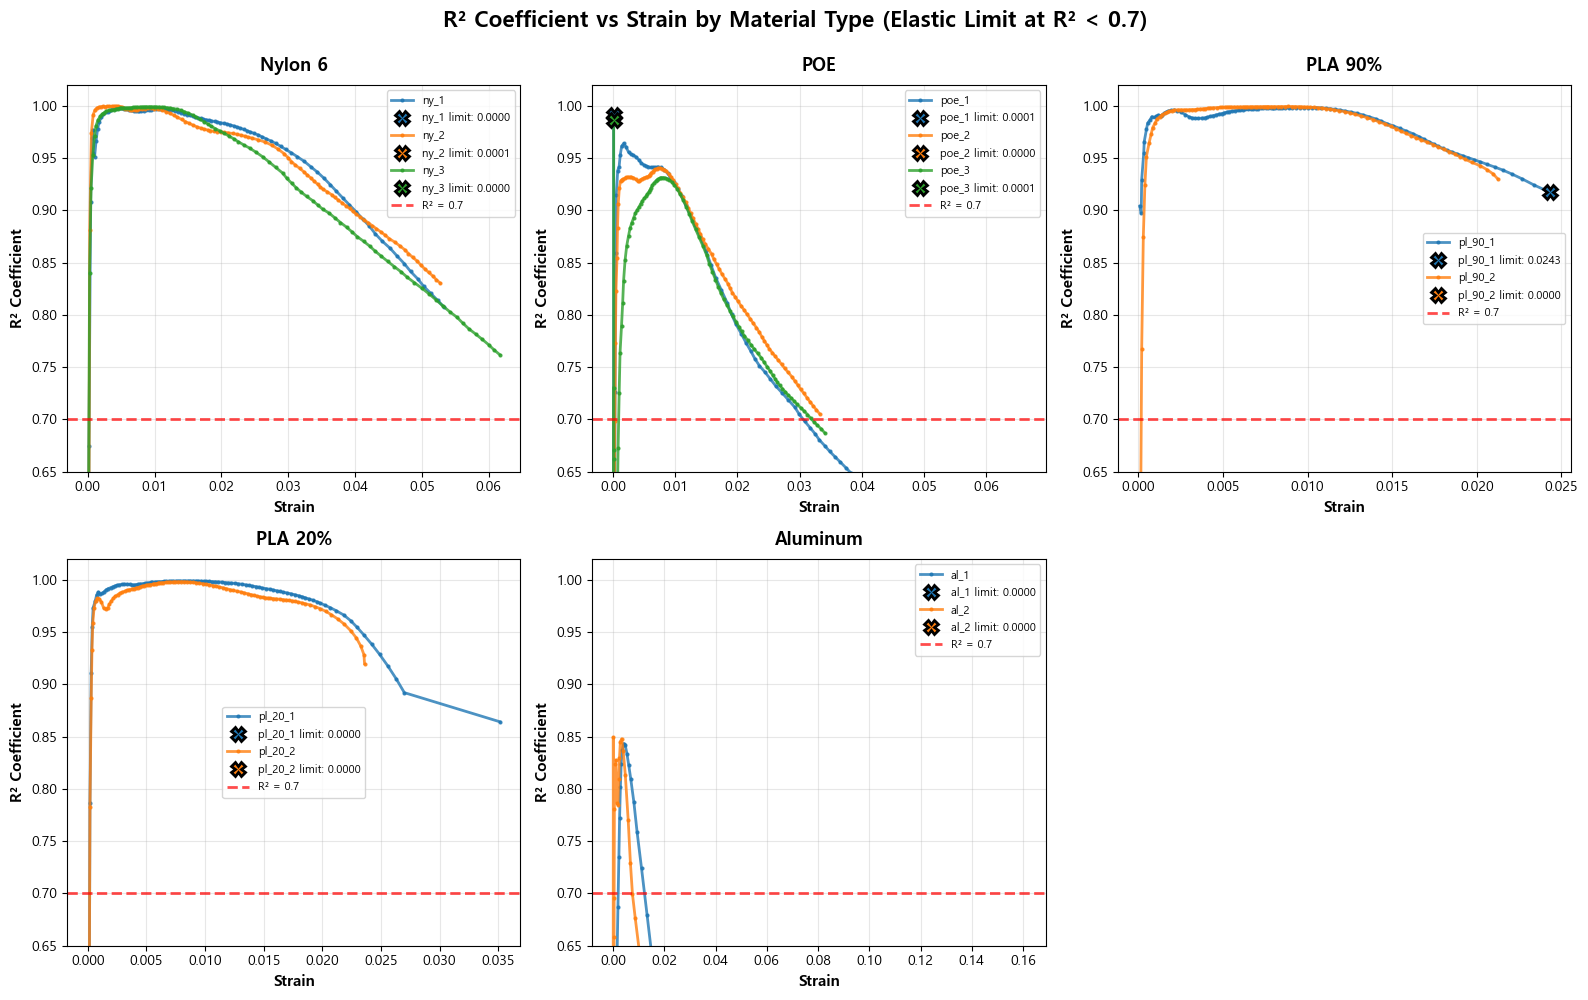


ELASTIC LIMIT SUMMARY (Strain values where R² < 0.7)

Nylon 6:
  ny_1: 0.000000
  ny_2: 0.000070
  ny_3: 0.000000
  Average: 0.000023 ± 0.000033

POE:
  poe_1: 0.000100
  poe_2: 0.000000
  poe_3: 0.000100
  Average: 0.000066 ± 0.000047

PLA 90%:
  pl_90_1: 0.024347
  pl_90_2: 0.000000
  Average: 0.012173 ± 0.012173

PLA 20%:
  pl_20_1: 0.000000
  pl_20_2: 0.000000
  Average: 0.000000 ± 0.000000

Aluminum:
  al_1: 0.000000
  al_2: 0.000000
  Average: 0.000000 ± 0.000000

Plot saved as 'r2_vs_strain_elastic_limits.png'


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset names grouped by material type
datasets = {
    'Nylon 6': ['ny_1', 'ny_2', 'ny_3'],
    'POE': ['poe_1', 'poe_2', 'poe_3'],
    'PLA 90%': ['pl_90_1', 'pl_90_2'],
    'PLA 20%': ['pl_20_1', 'pl_20_2'],
    'Aluminum': ['al_1', 'al_2']
}

# R² threshold to define end of elastic region (typically 0.99 or 0.995)
R2_THRESHOLD = 0.7

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Color scheme for each sample within a material
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Store elastic limit results
elastic_limits = {}

# Process each material type
for idx, (material, dataset_names) in enumerate(datasets.items()):
    ax = axes[idx]
    elastic_limits[material] = []
    
    for sample_idx, dataset_name in enumerate(dataset_names):
        try:
            # Get the dataframe from the variable name
            df = globals()[dataset_name]
            
            # Handle different possible column name formats
            stress_col = None
            strain_col = None
            
            for col in df.columns:
                col_lower = col.lower().strip()
                if 'stress' in col_lower:
                    stress_col = col
                if 'strain' in col_lower:
                    strain_col = col
            
            if stress_col is None or strain_col is None:
                print(f"Skipping {dataset_name}: Could not find stress/strain columns")
                continue
            
            # Remove NaN values
            df_clean = df[[stress_col, strain_col]].dropna()
            
            # Skip if not enough data points
            if len(df_clean) < 10:
                print(f"Skipping {dataset_name}: insufficient data")
                continue
            
            # Calculate R² for increasing amounts of data
            strain_values = []
            r2_values = []
            
            # Start from at least 10 points and go up to full dataset
            for i in range(10, len(df_clean) + 1, max(1, len(df_clean) // 100)):
                subset = df_clean.iloc[:i]
                
                X = subset[strain_col].values.reshape(-1, 1)
                y = subset[stress_col].values
                
                # Fit linear regression
                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R²
                r2 = r2_score(y, y_pred)
                
                # Store max strain value and R²
                strain_values.append(subset[strain_col].max())
                r2_values.append(r2)
            
            # Find where R² drops below threshold (end of elastic region)
            elastic_limit_strain = None
            for i, r2 in enumerate(r2_values):
                if r2 < R2_THRESHOLD:
                    elastic_limit_strain = strain_values[i]
                    break
            
            # If R² never drops below threshold, use the last point
            if elastic_limit_strain is None:
                elastic_limit_strain = strain_values[-1]
            
            elastic_limits[material].append({
                'sample': dataset_name,
                'strain': elastic_limit_strain
            })
            
            # Plot the curve
            line = ax.plot(strain_values, r2_values, marker='o', markersize=2, 
                   label=dataset_name, linewidth=2, alpha=0.8, 
                   color=colors[sample_idx % len(colors)])[0]
            
            # Mark the elastic limit point
            if elastic_limit_strain is not None:
                # Find the R² value at elastic limit
                idx_limit = np.argmin(np.abs(np.array(strain_values) - elastic_limit_strain))
                r2_at_limit = r2_values[idx_limit]
                
                ax.plot(elastic_limit_strain, r2_at_limit, 'X', 
                       markersize=10, markeredgewidth=2,
                       color=line.get_color(), 
                       markeredgecolor='black',
                       label=f'{dataset_name} limit: {elastic_limit_strain:.4f}')
            
        except KeyError:
            print(f"Dataframe not found: {dataset_name}")
        except Exception as e:
            print(f"Error processing {dataset_name}: {str(e)}")
    
    # Add horizontal line at R² threshold
    ax.axhline(y=R2_THRESHOLD, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'R² = {R2_THRESHOLD}')
    
    # Customize each subplot
    ax.set_xlabel('Strain', fontsize=11, fontweight='bold')
    ax.set_ylabel('R² Coefficient', fontsize=11, fontweight='bold')
    ax.set_title(material, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')
    ax.set_ylim([max(0, R2_THRESHOLD - 0.05), 1.02])

# Remove extra subplot
axes[-1].remove()

# Overall title
fig.suptitle(f'R² Coefficient vs Strain by Material Type (Elastic Limit at R² < {R2_THRESHOLD})', 
            fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()

# Save the plot
plt.savefig('r2_vs_strain_elastic_limits.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary of elastic limits
print("\n" + "="*60)
print("ELASTIC LIMIT SUMMARY (Strain values where R² < {})".format(R2_THRESHOLD))
print("="*60)
for material, limits in elastic_limits.items():
    print(f"\n{material}:")
    strains = [l['strain'] for l in limits]
    for limit in limits:
        print(f"  {limit['sample']}: {limit['strain']:.6f}")
    if strains:
        print(f"  Average: {np.mean(strains):.6f} ± {np.std(strains):.6f}")

print("\nPlot saved as 'r2_vs_strain_elastic_limits.png'")

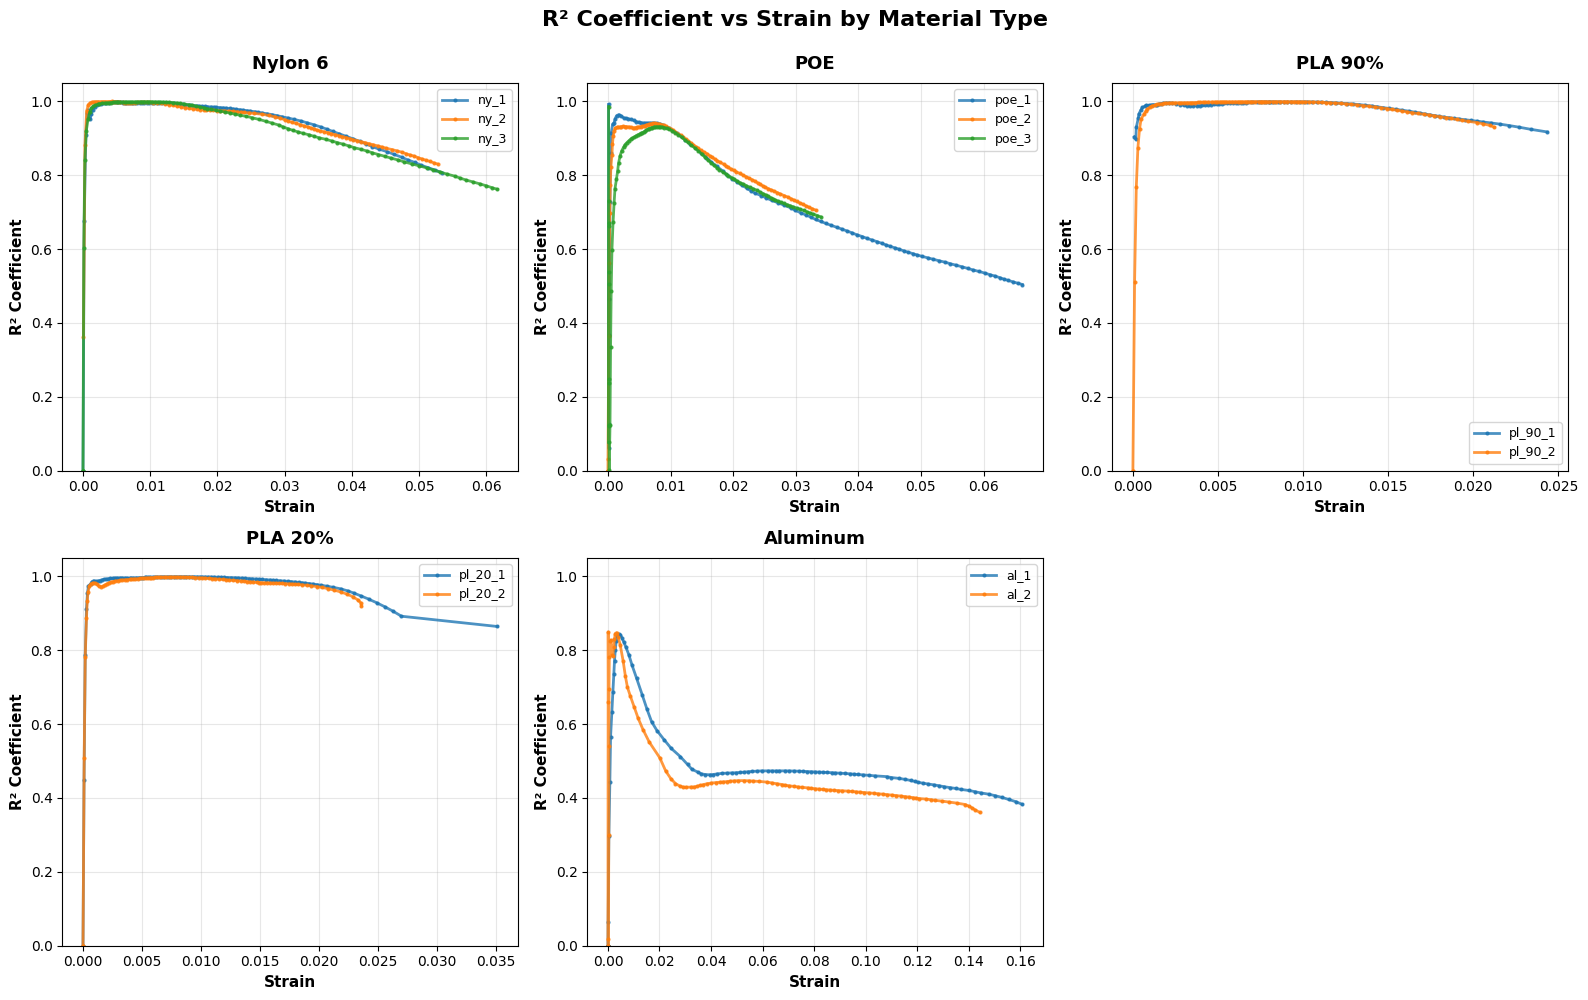

Plot saved as 'r2_vs_strain_by_material.png'


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset names grouped by material type
datasets = {
    'Nylon 6': ['ny_1', 'ny_2', 'ny_3'],
    'POE': ['poe_1', 'poe_2', 'poe_3'],
    'PLA 90%': ['pl_90_1', 'pl_90_2'],
    'PLA 20%': ['pl_20_1', 'pl_20_2'],
    'Aluminum': ['al_1', 'al_2']
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Color scheme for each sample within a material
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Process each material type
for idx, (material, dataset_names) in enumerate(datasets.items()):
    ax = axes[idx]
    
    for sample_idx, dataset_name in enumerate(dataset_names):
        try:
            # Get the dataframe from the variable name
            df = globals()[dataset_name]
            
            # Handle different possible column name formats
            stress_col = None
            strain_col = None
            
            for col in df.columns:
                col_lower = col.lower().strip()
                if 'stress' in col_lower:
                    stress_col = col
                if 'strain' in col_lower:
                    strain_col = col
            
            if stress_col is None or strain_col is None:
                print(f"Skipping {dataset_name}: Could not find stress/strain columns")
                continue
            
            # Remove NaN values
            df_clean = df[[stress_col, strain_col]].dropna()
            
            # Skip if not enough data points
            if len(df_clean) < 10:
                print(f"Skipping {dataset_name}: insufficient data")
                continue
            
            # Calculate R² for increasing amounts of data
            strain_values = []
            r2_values = []
            
            # Start from at least 10 points and go up to full dataset
            for i in range(10, len(df_clean) + 1, max(1, len(df_clean) // 100)):
                subset = df_clean.iloc[:i]
                
                X = subset[strain_col].values.reshape(-1, 1)
                y = subset[stress_col].values
                
                # Fit linear regression
                model = LinearRegression()
                model.fit(X, y)
                y_pred = model.predict(X)
                
                # Calculate R²
                r2 = r2_score(y, y_pred)
                
                # Store max strain value and R²
                strain_values.append(subset[strain_col].max())
                r2_values.append(r2)
            
            # Plot the curve
            ax.plot(strain_values, r2_values, marker='o', markersize=2, 
                   label=dataset_name, linewidth=2, alpha=0.8, 
                   color=colors[sample_idx % len(colors)])
            
        except KeyError:
            print(f"Dataframe not found: {dataset_name}")
        except Exception as e:
            print(f"Error processing {dataset_name}: {str(e)}")
    
    # Customize each subplot
    ax.set_xlabel('Strain', fontsize=11, fontweight='bold')
    ax.set_ylabel('R² Coefficient', fontsize=11, fontweight='bold')
    ax.set_title(material, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9, loc='best')
    ax.set_ylim([0, 1.05])

# Remove extra subplot
axes[-1].remove()

# Overall title
fig.suptitle('R² Coefficient vs Strain by Material Type', 
            fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()

# Save the plot
plt.savefig('r2_vs_strain_by_material.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved as 'r2_vs_strain_by_material.png'")

In [9]:
print(np.polyfit(ny_1.loc[ny_1['strain']<0.02]['strain'],ny_1.loc[ny_1['strain']<0.02]['Stress(MPa)'],1))
print(np.polyfit(ny_2.loc[ny_2['strain']<0.02]['strain'],ny_2.loc[ny_2['strain']<0.02]['Stress(MPa)'],1))
print(np.polyfit(ny_3.loc[ny_3['strain']<0.02]['strain'],ny_3.loc[ny_3['strain']<0.02]['Stress(MPa)'],1))

[2.22353529e+03 2.08949890e+00]
[2081.59993623    3.03708491]
[2265.19378969    3.13684178]


In [99]:
import numpy as np
print(np.polyfit(poe_1.loc[poe_1['strain']<0.01]['strain'],poe_1.loc[poe_1['strain']<0.01]['Stress(MPa)'],1))
print(np.polyfit(poe_1['strain'],poe_1['Stress(MPa)'],1))

print(np.polyfit(poe_2.loc[poe_2['strain']<0.01]['strain'],poe_2.loc[poe_2['strain']<0.01]['Stress(MPa)'],1))
print(np.polyfit(poe_3.loc[poe_3['strain']<0.01]['strain'],poe_3.loc[poe_3['strain']<0.01]['Stress(MPa)'],1))

[1915.67873414    3.41279059]
[208.2155157   12.40275805]
[1773.19761403    3.44191017]
[1844.45909701    3.78972007]


In [104]:
print(np.polyfit(pl_90_1.loc[pl_90_1['strain']<0.015]['strain'],pl_90_1.loc[pl_90_1['strain']<0.015]['Stress(MPa)'],1))
print(np.polyfit(pl_90_2.loc[pl_90_2['strain']<0.015]['strain'],pl_90_2.loc[pl_90_2['strain']<0.015]['Stress(MPa)'],1))

print(np.polyfit(pl_20_1.loc[pl_20_1['strain']<0.015]['strain'],pl_20_1.loc[pl_20_1['strain']<0.015]['Stress(MPa)'],1))
print(np.polyfit(pl_20_2.loc[pl_20_2['strain']<0.015]['strain'],pl_20_2.loc[pl_20_2['strain']<0.015]['Stress(MPa)'],1))


[1.73256963e+03 1.52061042e+00]
[1.75850338e+03 1.73670596e+00]
[1396.16954404    1.43382047]
[1431.56377987    2.05088287]


In [110]:
print(np.polyfit(al_1.loc[al_1['strain']<0.003]['strain'],al_1.loc[al_1['strain']<0.003]['Stress(MPa)'],1))
print(np.polyfit(al_2.loc[al_2['strain']<0.004]['strain'],al_2.loc[al_2['strain']<0.004]['Stress(MPa)'],1))


[6.79623368e+04 6.39555675e+01]
[70019.78535844    72.14938852]


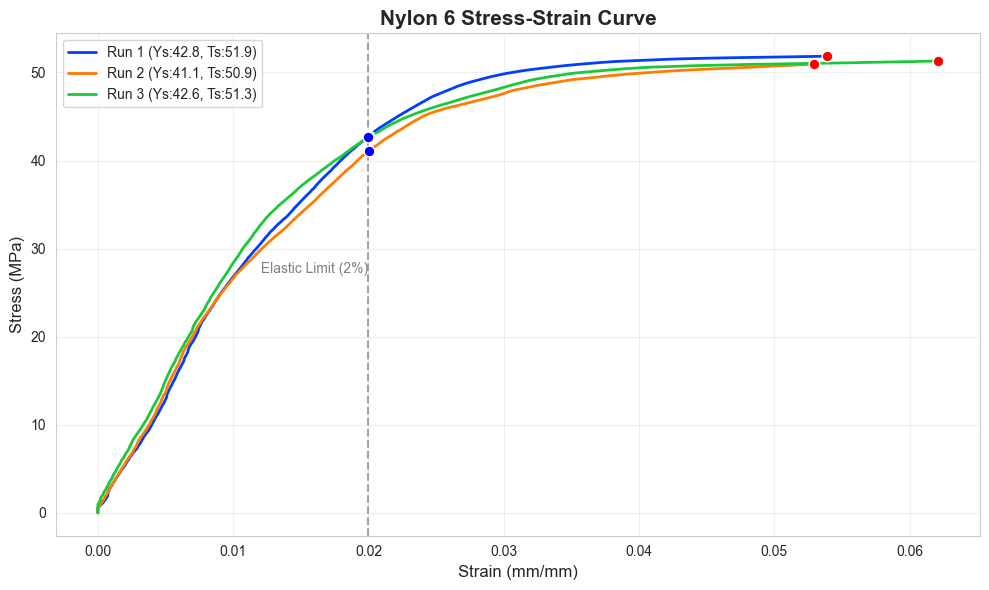

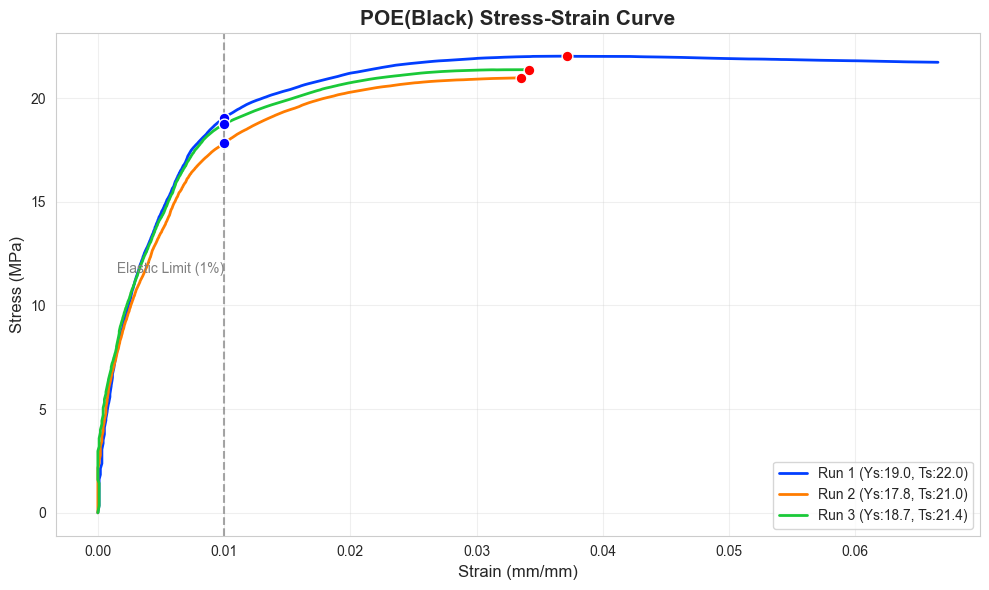

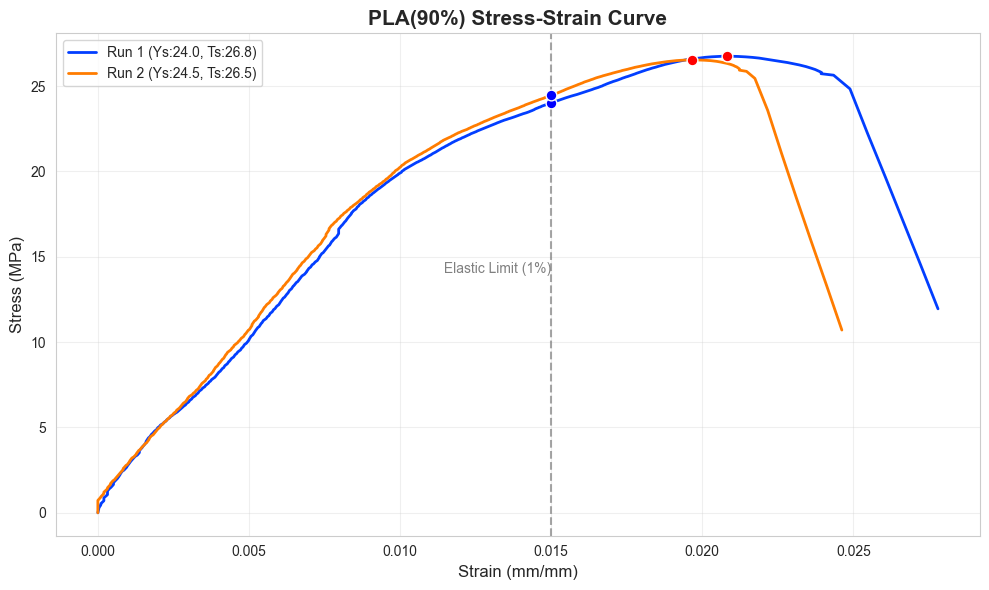

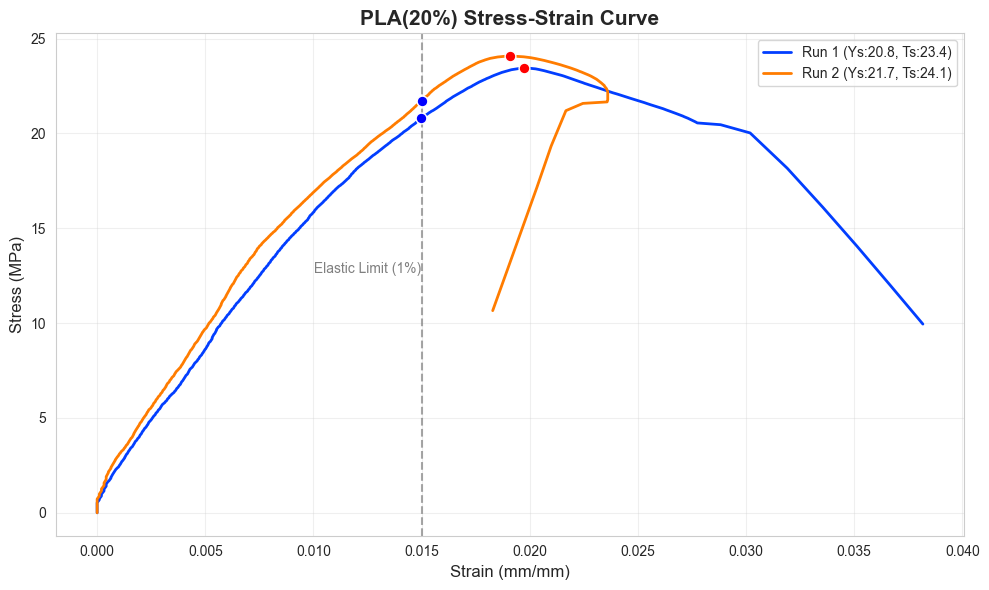

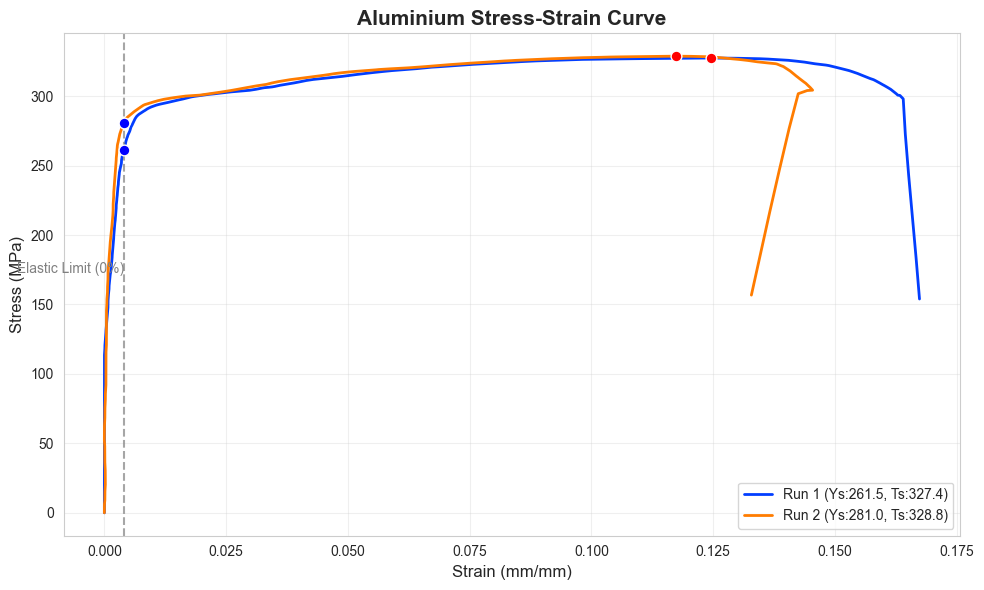

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1. 기본 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette("bright")
L0 = 50.2  # 표점 거리

# 2. 치수 정보 (계산용)
dimensions = {
    "Nylon 6":    {1: (12.72, 3.13), 2: (12.72, 3.13), 3: (12.72, 3.13)},
    "POE(Black)": {1: (10.25, 4.10), 2: (10.25, 4.10), 3: (10.25, 4.10)},
    "PLA(90%)":   {1: (12.79, 3.43), 2: (12.79, 3.43)},
    "PLA(20%)":   {1: (12.79, 3.43), 2: (12.79, 3.43)},
    "Aluminium":  {1: (12.50, 2.92), 2: (12.50, 2.92)}
}

# 3. 데이터 및 설정 모음
# (변수명, 데이터프레임 리스트, 탄성한계 변형률)
materials_config = [
    ("Nylon 6", [ny_1, ny_2, ny_3], 0.02),       # 2%
    ("POE(Black)", [poe_1, poe_2, poe_3], 0.01), # 2%
    ("PLA(90%)", [pl_90_1, pl_90_2], 0.015),      # 3%
    ("PLA(20%)", [pl_20_1, pl_20_2], 0.015),      # 3%
    ("Aluminium", [al_1, al_2], 0.004)            # 2%
]

def plot_final_all_materials():
    # 색상 팔레트 가져오기
    colors = sns.color_palette('bright', 5) 

    for mat_name, dfs, limit_strain in materials_config:
        plt.figure(figsize=(10, 6))
        
        for i, df in enumerate(dfs):
            run_id = i + 1
            if run_id not in dimensions[mat_name]: continue
            
            w, t = dimensions[mat_name][run_id]
            area = w * t
            
            # 데이터 복사 및 정리 (인덱스 리셋 중요)
            temp_df = df.copy().reset_index(drop=True)
            
            # 컬럼명 처리 (사용자 환경에 맞춤)
            load_col = '하중(kgf)' if '하중(kgf)' in temp_df.columns else temp_df.columns[1]
            ext_col = '신율(mm)' if '신율(mm)' in temp_df.columns else temp_df.columns[0]

            # 응력 & 변형률 계산
            temp_df['Stress'] = temp_df[load_col] * 9.80665 / area
            temp_df['Strain'] = temp_df[ext_col] / L0
            
            # --- 데이터 꼬리 자르기 (최대점 이후 급락 구간 제거) ---
            idx_max = temp_df['Stress'].argmax()
            # temp_df = temp_df.iloc[:idx_max+5] # 최대점 이후 5개 데이터까지만 포함
            
            # --- 물성치 계산 ---
            # 1. Tensile Strength (최대 응력)
            ts = temp_df.iloc[idx_max]['Stress']
            ts_strain = temp_df.iloc[idx_max]['Strain']
            
            # 2. Yield Point (설정된 탄성한계 지점)
            max_strain_reached = temp_df['Strain'].max()
            
            ys = 0
            label_str = ""
            
            # 탄성한계 도달 여부 확인 (PLA 20% 처럼 일찍 끊어지는 경우 대비)
            if max_strain_reached >= limit_strain:
                idx_yield = (np.abs(temp_df['Strain'] - limit_strain)).argmin()
                ys = temp_df.iloc[idx_yield]['Stress']
                ys_strain = temp_df.iloc[idx_yield]['Strain']
                
                # 파란 점 (Yield)
                plt.scatter(ys_strain, ys, color='blue', s=60, zorder=10, edgecolors='white')
                label_str = f"Run {run_id} (Ys:{ys:.1f}, Ts:{ts:.1f})"
            else:
                # 도달 못하고 파단됨
                label_str = f"Run {run_id} (Break < {int(limit_strain*100)}%, Ts:{ts:.1f})"
            
            # 빨간 점 (Tensile) - 항상 표시
            plt.scatter(ts_strain, ts, color='red', s=60, zorder=10, edgecolors='white')
            
            # --- 그래프 그리기 (plt.plot 사용!) ---
            # 데이터 순서대로 이어지므로 꼬임 없음
            plt.plot(temp_df['Strain'], temp_df['Stress'], label=label_str, color=colors[i], linewidth=2)

        # 공통 요소 그리기
        plt.axvline(x=limit_strain, color='gray', linestyle='--', alpha=0.7)
        plt.text(limit_strain, plt.ylim()[1]*0.5, f' Elastic Limit ({int(limit_strain*100)}%)', color='gray', ha='right')

        plt.title(f"{mat_name} Stress-Strain Curve", fontsize=15, fontweight='bold')
        plt.xlabel("Strain (mm/mm)", fontsize=12)
        plt.ylabel("Stress (MPa)", fontsize=12)
        plt.legend(loc='best') # 범례 위치 자동 최적화
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # 저장 및 출력
        filename = f"Final_{mat_name.replace(' ', '_').replace('(', '').replace(')', '').replace('%', '')}.png"
        plt.savefig(filename)
        plt.show()

plot_final_all_materials()

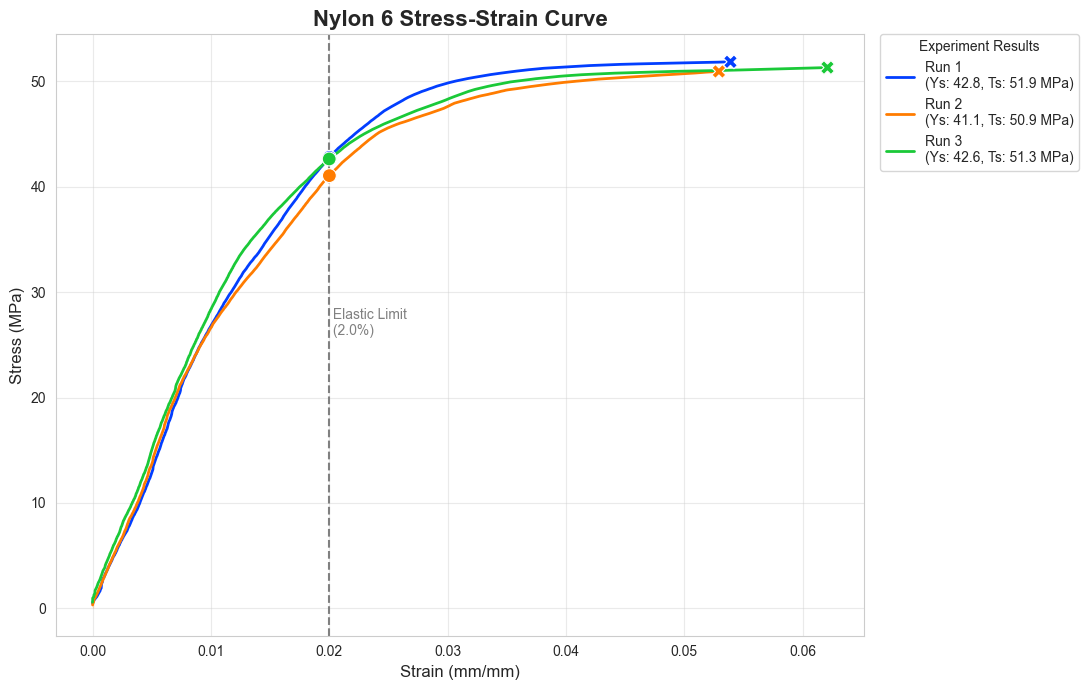

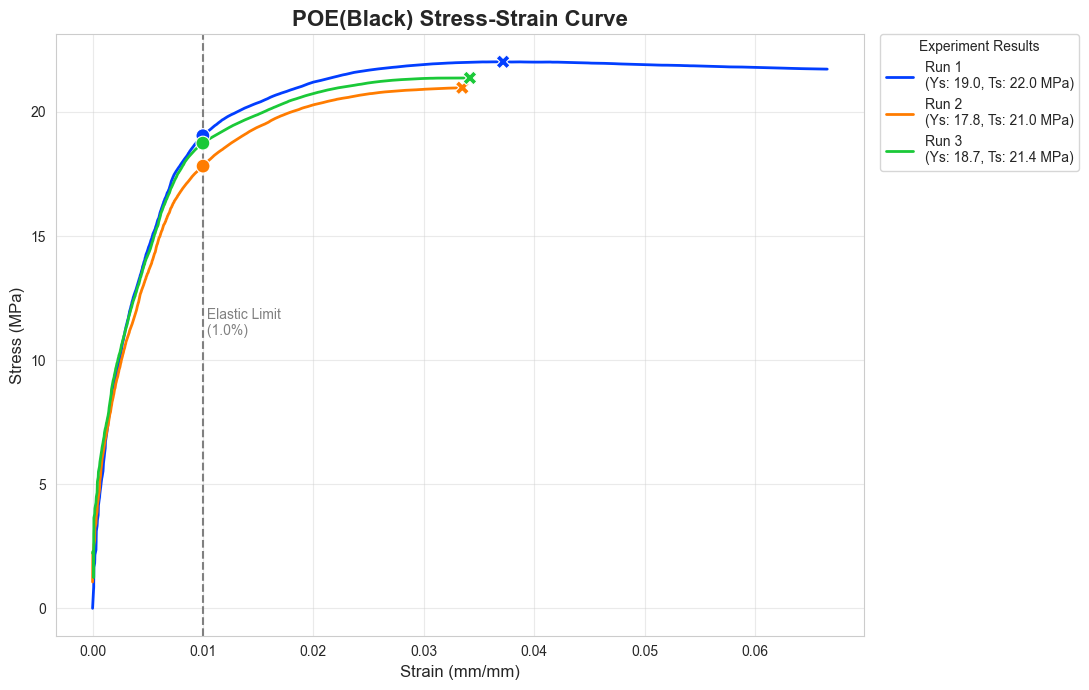

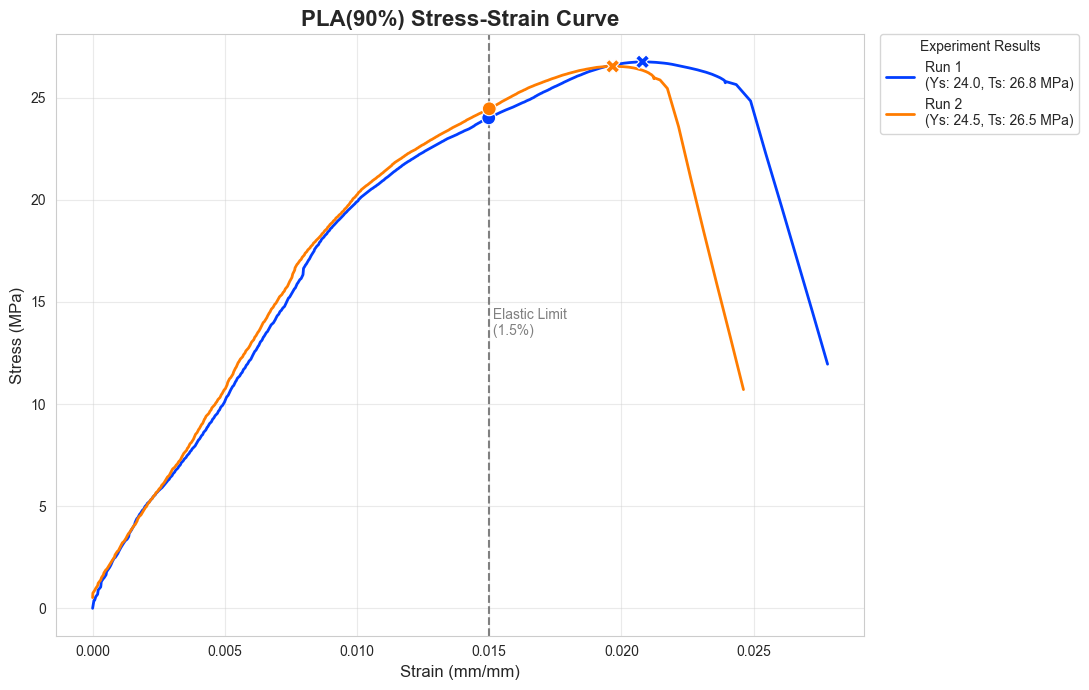

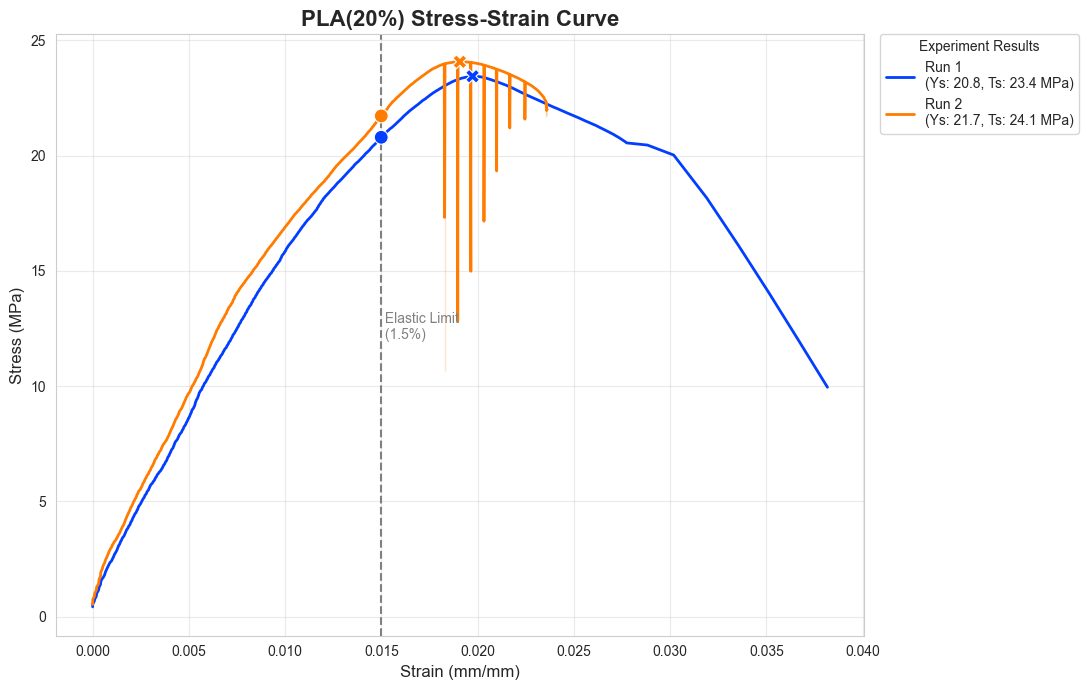

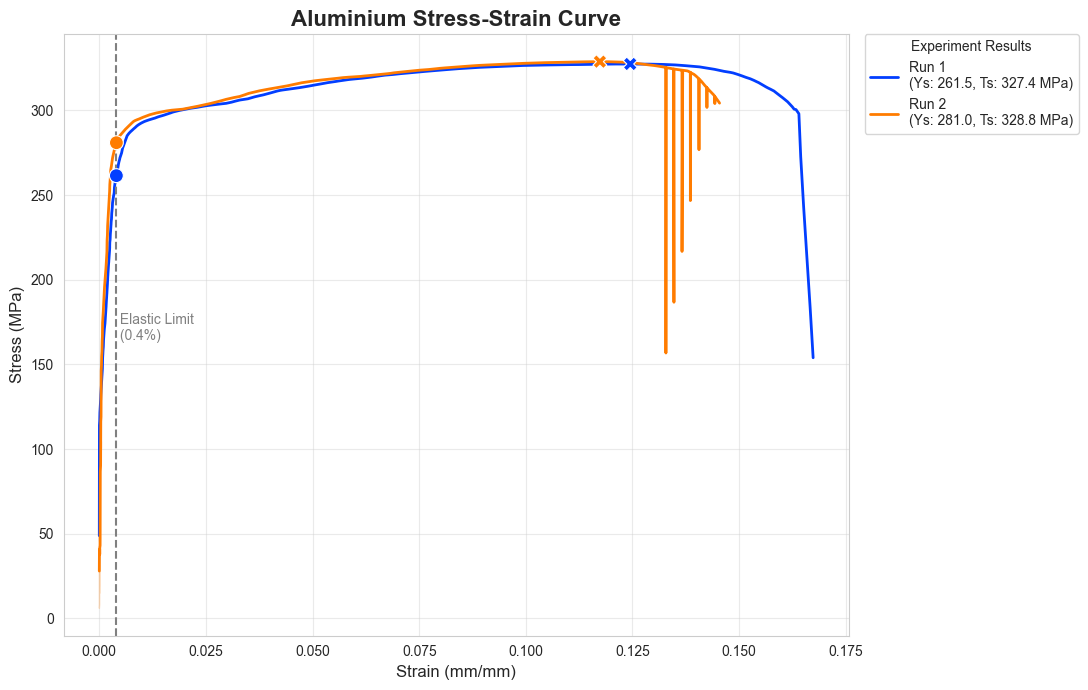

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. 기본 설정
plt.rcParams['font.family'] = 'sans-serif'
sns.set_style("whitegrid")
L0 = 50.2  # 표점 거리

# 2. 시편 규격
dimensions = {
    "Nylon 6":    {1: (12.72, 3.13), 2: (12.72, 3.13), 3: (12.72, 3.13)},
    "POE(Black)": {1: (10.25, 4.10), 2: (10.25, 4.10), 3: (10.25, 4.10)},
    "PLA(90%)":   {1: (12.79, 3.43), 2: (12.79, 3.43)},
    "PLA(20%)":   {1: (12.79, 3.43), 2: (12.79, 3.43)},
    "Aluminium":  {1: (12.50, 2.92), 2: (12.50, 2.92)}
}

# 3. 데이터 구성 (사용자 변수 사용)
materials_config = [
    ("Nylon 6", [ny_1, ny_2, ny_3], 0.02),
    ("POE(Black)", [poe_1, poe_2, poe_3], 0.01),
    ("PLA(90%)", [pl_90_1, pl_90_2], 0.015),
    ("PLA(20%)", [pl_20_1, pl_20_2], 0.015),
    ("Aluminium", [al_1, al_2], 0.004)
]

def plot_seaborn_stress_strain(material_name, dfs, limit_strain):
    combined_data = []
    points_data = []
    
    # --- 데이터 가공 및 물성치 계산 ---
    for i, df in enumerate(dfs):
        run_id = i + 1
        w, t = dimensions[material_name][run_id]
        area = w * t
        
        # 복사본 생성 및 인덱스 초기화 (중복 방지)
        temp_df = df.copy().reset_index(drop=True)
        
        # 컬럼명 확인 및 통일
        # 데이터에 '하중(kgf)' 등의 이름이 포함되어 있는지 확인 후 처리
        load_col = '하중(kgf)' if '하중(kgf)' in temp_df.columns else temp_df.columns[1]
        ext_col = '신율(mm)' if '신율(mm)' in temp_df.columns else temp_df.columns[0]

        # 응력 & 변형률 계산
        temp_df['Stress'] = temp_df[load_col] * 9.80665 / area
        temp_df['Strain'] = temp_df[ext_col] / L0
        
        # 1. Yield Point (탄성한계 지점)
        idx_yield = (np.abs(temp_df['Strain'] - limit_strain)).argmin()
        ys = temp_df.iloc[idx_yield]['Stress']
        ys_strain = temp_df.iloc[idx_yield]['Strain']
        
        # 2. Tensile Strength (최대 응력)
        idx_max = temp_df['Stress'].argmax()
        ts = temp_df.iloc[idx_max]['Stress']
        ts_strain = temp_df.iloc[idx_max]['Strain']
        
        # 3. 범례용 라벨 생성
        label_str = f"Run {run_id}\n(Ys: {ys:.1f}, Ts: {ts:.1f} MPa)"
        temp_df['Legend_Label'] = label_str
        
        combined_data.append(temp_df)
        
        # 점 데이터 저장
        points_data.append({'Strain': ys_strain, 'Stress': ys, 'Legend_Label': label_str, 'Type': 'Yield'})
        points_data.append({'Strain': ts_strain, 'Stress': ts, 'Legend_Label': label_str, 'Type': 'Tensile'})

    # 데이터프레임 합치기 (★여기서 ignore_index=True로 인덱스 재설정★)
    final_df = pd.concat(combined_data, ignore_index=True)
    points_df = pd.DataFrame(points_data)
    
    # --- 그래프 그리기 ---
    plt.figure(figsize=(11, 7))
    
    # 1. 메인 라인 플롯
    sns.lineplot(data=final_df, x='Strain', y='Stress', hue='Legend_Label', palette='bright', linewidth=2)
    
    # 2. 포인트 찍기 (Yield & Tensile)
    sns.scatterplot(data=points_df, x='Strain', y='Stress', hue='Legend_Label', style='Type', 
                    s=100, palette='bright', legend=False, zorder=10)
    
    # 3. 탄성 영역 표시
    plt.axvline(x=limit_strain, color='gray', linestyle='--', linewidth=1.5)
    # 텍스트 위치 자동 조정을 위해 y값 설정
    text_y_pos = final_df['Stress'].max() * 0.5
    plt.text(limit_strain, text_y_pos, f' Elastic Limit\n ({limit_strain*100}%)', color='gray')

    # 스타일링
    plt.title(f"{material_name} Stress-Strain Curve", fontsize=16, fontweight='bold')
    plt.xlabel("Strain (mm/mm)", fontsize=12)
    plt.ylabel("Stress (MPa)", fontsize=12)
    plt.grid(True, alpha=0.4)
    
    # 범례 위치 조정
    plt.legend(title="Experiment Results", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.tight_layout()
    plt.show()

# --- 실행 ---
for name, dfs, limit in materials_config:
    plot_seaborn_stress_strain(name, dfs, limit)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. 기본 설정
plt.rcParams['font.family'] = 'sans-serif'
sns.set_style("whitegrid")
L0 = 50.2
OFFSET_STEP = 0.05  # 그래프 간 간격 (5% 씩 이동)

# 2. 데이터 준비 (PLA 20% 예시)
# (앞선 데이터프레임 pl_20_1, pl_20_2가 있다고 가정)
dfs = [pl_20_1, pl_20_2]
dimensions = {1: (12.79, 3.43), 2: (12.79, 3.43)}
limit_strain_ratio = 0.03 # 3%

def plot_offset_pla20():
    plt.figure(figsize=(10, 7))
    colors = sns.color_palette('bright', n_colors=len(dfs))
    
    for i, df in enumerate(dfs):
        run_id = i + 1
        w, t = dimensions[run_id]
        area = w * t
        
        # 데이터 정리
        temp_df = df.copy().reset_index(drop=True)
        load_col = '하중(kgf)' if '하중(kgf)' in temp_df.columns else temp_df.columns[1]
        ext_col = '신율(mm)' if '신율(mm)' in temp_df.columns else temp_df.columns[0]

        # 응력 & 변형률 계산
        temp_df['Stress'] = temp_df[load_col] * 9.80665 / area
        origin_strain = temp_df[ext_col] / L0
        
        # ★ 핵심: X축 오프셋 적용 ★
        current_offset = i * OFFSET_STEP
        temp_df['Strain_Shifted'] = origin_strain + current_offset
        
        # 물성치 계산 (원본 Strain 기준)
        # 1. Yield Point (3% of Max Strain)
        max_strain_val = origin_strain.max()
        limit_strain_val = max_strain_val * limit_strain_ratio
        
        idx_yield = (np.abs(origin_strain - limit_strain_val)).argmin()
        ys = temp_df.iloc[idx_yield]['Stress']
        ys_x = temp_df.iloc[idx_yield]['Strain_Shifted'] # 그래프용 X좌표
        
        # 2. Tensile Strength (Max Stress)
        idx_max = temp_df['Stress'].argmax()
        ts = temp_df.iloc[idx_max]['Stress']
        ts_x = temp_df.iloc[idx_max]['Strain_Shifted']   # 그래프용 X좌표
        
        # 라벨 (오프셋 정보 포함)
        label_str = f"Run {run_id} (Offset +{current_offset:.2f})"
        
        # 그래프 그리기
        plt.plot(temp_df['Strain_Shifted'], temp_df['Stress'], label=label_str, color=colors[i], linewidth=2)
        
        # 포인트 찍기
        # Yield (파란점)
        plt.scatter(ys_x, ys, color='blue', s=60, zorder=5, edgecolors='white')
        # Tensile (빨간점)
        plt.scatter(ts_x, ts, color='red', s=60, zorder=5, edgecolors='white')
        
        # 탄성 한계선 (점선) - 오프셋 적용된 위치에 그리기
        # limit_strain_val + current_offset 위치에 수직선
        limit_x = limit_strain_val + current_offset
        plt.plot([limit_x, limit_x], [0, ts], color=colors[i], linestyle='--', alpha=0.5)
        
        # 텍스트 표시 (Run 번호 등)
        plt.text(ts_x, ts + 1, f"Run {run_id}\nTS: {ts:.1f}", ha='center', color=colors[i], fontweight='bold')

    plt.title("PLA(20%) Stress-Strain Curves (Offset View)", fontsize=15)
    plt.xlabel("Strain (Shifted)", fontsize=12)
    plt.ylabel("Stress (MPa)", fontsize=12)
    
    # X축 눈금 조정 (오프셋 된 것임을 알 수 있게)
    # plt.xticks([]) # 필요하다면 X축 눈금을 숨길 수도 있음
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_offset_pla20()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25716\4153211794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Material'] = material
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25716\4153211794.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Run'] = str(run)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25716\4153211794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

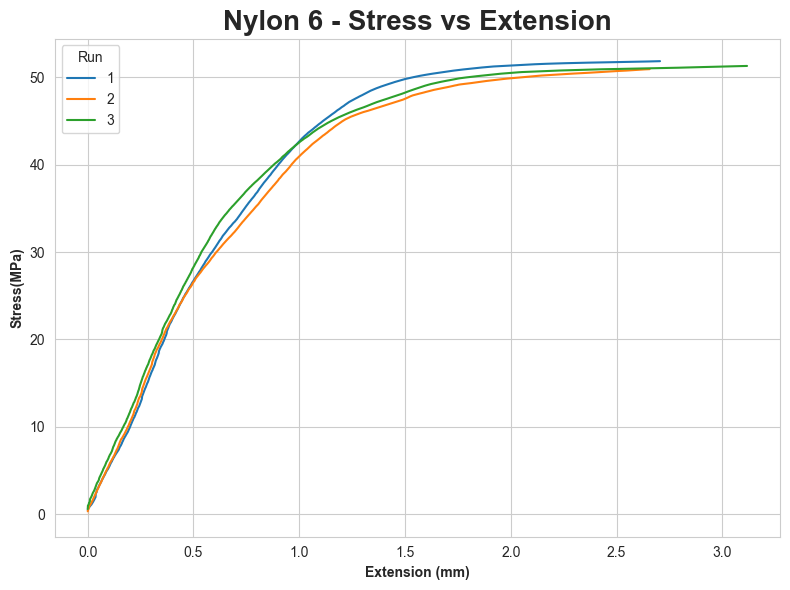

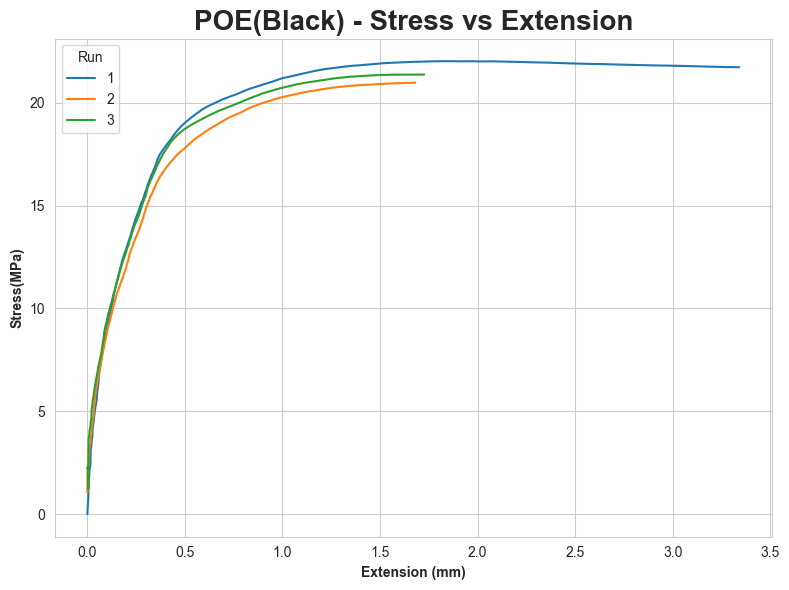

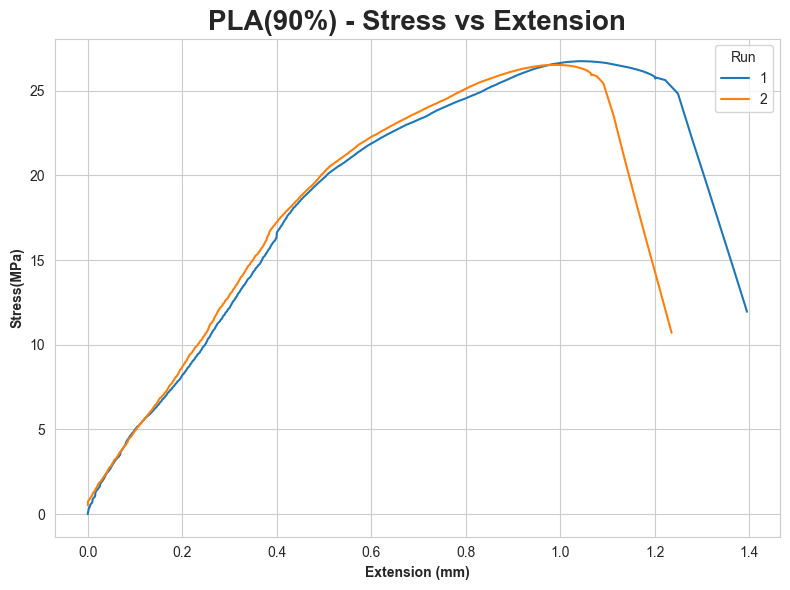

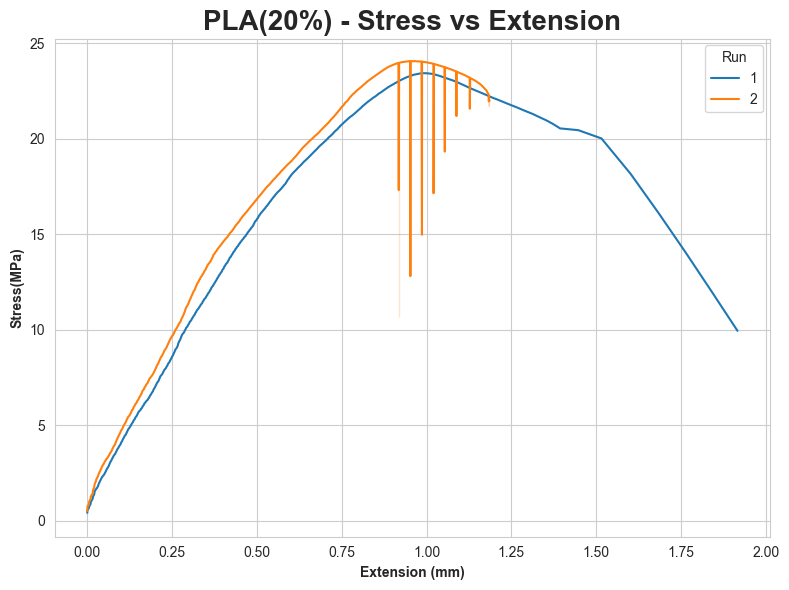

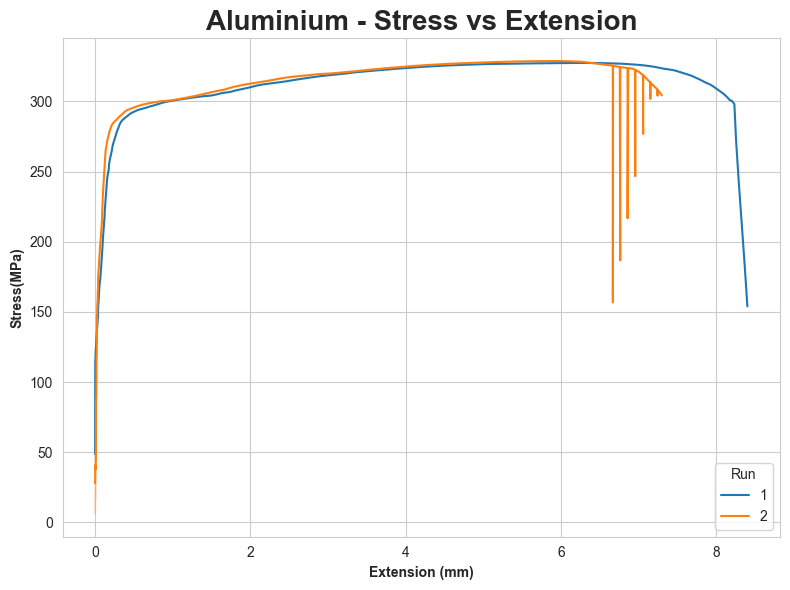

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
data_list = []
def process_and_add(df_subset, material, run):
    df_subset.columns = ['Extension', 'Load','Stress']
    df_subset['Extension'] = pd.to_numeric(df_subset['Extension'], errors='coerce')
    df_subset['Stress'] = pd.to_numeric(df_subset['Stress'], errors='coerce')
    df_subset = df_subset.dropna()
    df_subset['Material'] = material
    df_subset['Run'] = str(run)
    data_list.append(df_subset)

# Apply processing
process_and_add(ny_1, 'Nylon 6', 1)
process_and_add(ny_2, 'Nylon 6', 2)
process_and_add(ny_3, 'Nylon 6', 3)
process_and_add(poe_1, 'POE(Black)', 1)
process_and_add(poe_2, 'POE(Black)', 2)
process_and_add(poe_3, 'POE(Black)', 3)
process_and_add(pl_90_1, 'PLA(90%)', 1)
process_and_add(pl_90_2, 'PLA(90%)', 2)
process_and_add(pl_20_1, 'PLA(20%)', 1)
process_and_add(pl_20_2, 'PLA(20%)', 2)
process_and_add(al_1, 'Aluminium', 1)
process_and_add(al_2, 'Aluminium', 2)

final_df = pd.concat(data_list, ignore_index=True)

# 4. Plotting individually
sns.set_style("whitegrid")
materials = final_df['Material'].unique()

for mat in materials:
    plt.figure(figsize=(8, 6))
    subset = final_df[final_df['Material'] == mat]
    
    sns.lineplot(data=subset, x='Extension', y='Stress', hue='Run', palette='tab10')
    
    plt.title(f"{mat} - Stress vs Extension",weight='bold',fontsize=20)
    plt.xlabel("Extension (mm)",weight='bold')
    plt.ylabel("Stress(MPa)",weight='bold')
    plt.legend(title='Run')
    plt.tight_layout()
    
    # Save each plot with a unique name

In [6]:
# compute engineering stress (kgf -> N, divided by cross-sectional area mm^2 -> N/mm^2)
def _first_existing(var_names):
    for v in var_names:
        if v in globals():
            return globals()[v]
    raise NameError(f"None of variables found: {var_names}")

assignments = [
    ('ny_1', ['ny_w'], ['ny_t']),
    ('ny_2', ['ny_w'], ['ny_t']),
    ('ny_3', ['ny_w'], ['ny_t']),
    ('poe_1', ['poe_w'], ['poe_t']),
    ('poe_2', ['poe_w'], ['poe_t']),
    ('poe_3', ['poe_w'], ['poe_t']),
    ('pl_90_1', ['pla_90_w','pl_90_w'], ['pla_90_t','pl_90_t']),
    ('pl_90_2', ['pla_90_w','pl_90_w'], ['pla_90_t','pl_90_t']),
    ('pl_20_1', ['pl_20_w','pla_90_w','pl_90_w'], ['pl_20_t','pla_90_t','pl_90_t']),
    ('pl_20_2', ['pl_20_w','pla_90_w','pl_90_w'], ['pl_20_t','pla_90_t','pl_90_t']),
    ('al_1', ['al_w'], ['al_t']),
    ('al_2', ['al_w'], ['al_t']),
]

for df_name, w_candidates, t_candidates in assignments:
    if df_name not in globals():
        continue
    df = globals()[df_name]
    w = _first_existing(w_candidates)
    t = _first_existing(t_candidates)
    # ensure numeric and drop NaNs propagated if desired
    df['Stress'] = pd.to_numeric(df['하중(kgf)'], errors='coerce') * 9.807 / (float(w) * float(t))

KeyError: '하중(kgf)'

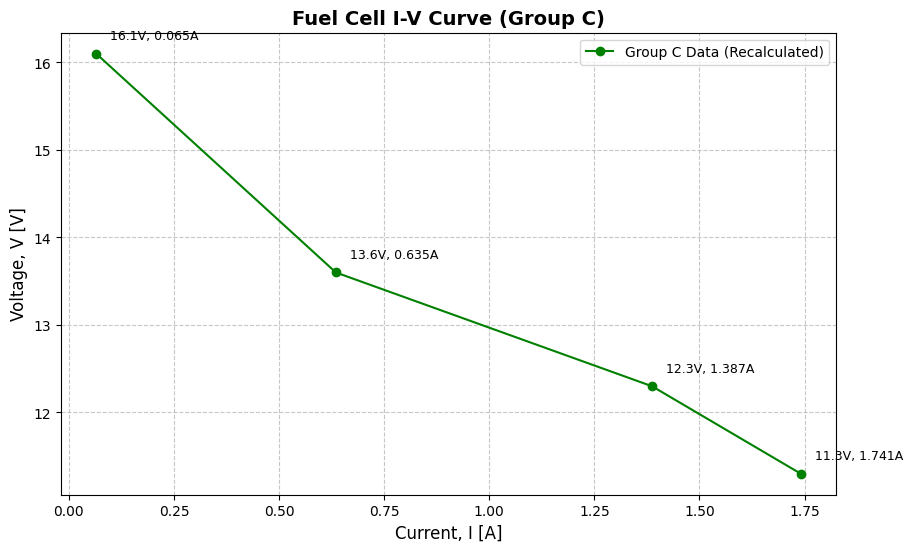

In [1]:
import matplotlib.pyplot as plt

# Recalculated Data for Group C
current_c = [0.065, 0.635, 1.387, 1.741]
voltage_c = [16.10, 13.60, 12.30, 11.30]
labels_c = ['Motor 1', 'Motor 1 + Lamp 1', 'Motor 1 + Lamp 1,2', 'Motor 1 + Lamp 1,2,3']

plt.figure(figsize=(10, 6))

# Plot
plt.plot(current_c, voltage_c, marker='o', linestyle='-', color='green', label='Group C Data (Recalculated)')

# Annotate
for i, txt in enumerate(labels_c):
    offset = (10, 10)
    plt.annotate(f"{voltage_c[i]}V, {current_c[i]}A", 
                 (current_c[i], voltage_c[i]), 
                 xytext=offset, textcoords='offset points', fontsize=9)

plt.title('Fuel Cell I-V Curve (Group C)', fontsize=14, fontweight='bold')
plt.xlabel('Current, I [A]', fontsize=12)
plt.ylabel('Voltage, V [V]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()